# House Price Prediction

#### Dataset Description

#### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:

- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?

#### Objective

You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.

#### Importing Necessary Libraries

In [53]:
import pandas as pd 
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#### Uploading Dataset

In [54]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [55]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [56]:
df.shape

(1168, 81)

- There are 1168 rows and 81 columns with the Target variable being SalePrice
- The Project contains 2 datasets mainly train data and test data

## Data Exploration

In [57]:
# As we have too many columns let sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- The Dataest is Mixed with Numerical and Categorical Features

#### Data Integrity Check

In [59]:
#For train Data
df.duplicated().sum()

0

In [60]:
#for test Data
df_test.duplicated().sum()

0

- There are no duplicated Values

##### Check for presense of any whitespaces, '?', 'NA', '-' in dataset

In [61]:
#For train Data
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [62]:
#for test Data
df_test.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

- There are no Whitespaces or unpredictable values in the Dataset

In [63]:
df.Id.value_counts()

127     1
1391    1
1389    1
448     1
1179    1
821     1
178     1
1076    1
60      1
733     1
739     1
1192    1
263     1
582     1
392     1
327     1
89      1
317     1
1287    1
841     1
218     1
436     1
1108    1
548     1
619     1
489     1
282     1
925     1
812     1
1345    1
104     1
1182    1
284     1
990     1
923     1
784     1
627     1
889     1
1283    1
876     1
1034    1
68      1
322     1
445     1
674     1
928     1
966     1
675     1
892     1
106     1
1233    1
453     1
1196    1
1355    1
916     1
1195    1
891     1
1128    1
403     1
459     1
225     1
274     1
364     1
813     1
478     1
1281    1
1054    1
319     1
1015    1
1265    1
366     1
307     1
82      1
720     1
292     1
1205    1
993     1
1367    1
75      1
1446    1
663     1
1103    1
463     1
1173    1
1270    1
1294    1
376     1
460     1
161     1
1300    1
57      1
1401    1
350     1
175     1
1051    1
235     1
209     1
915     1
240     1
1418    1


In [64]:
df = df.drop('Id',axis = 1)
df_test = df_test.drop('Id',axis = 1)

- Since Id column is inconcsistent we will remove it from the dataset

## Data Cleaning

### Train Data

#### Missing Values

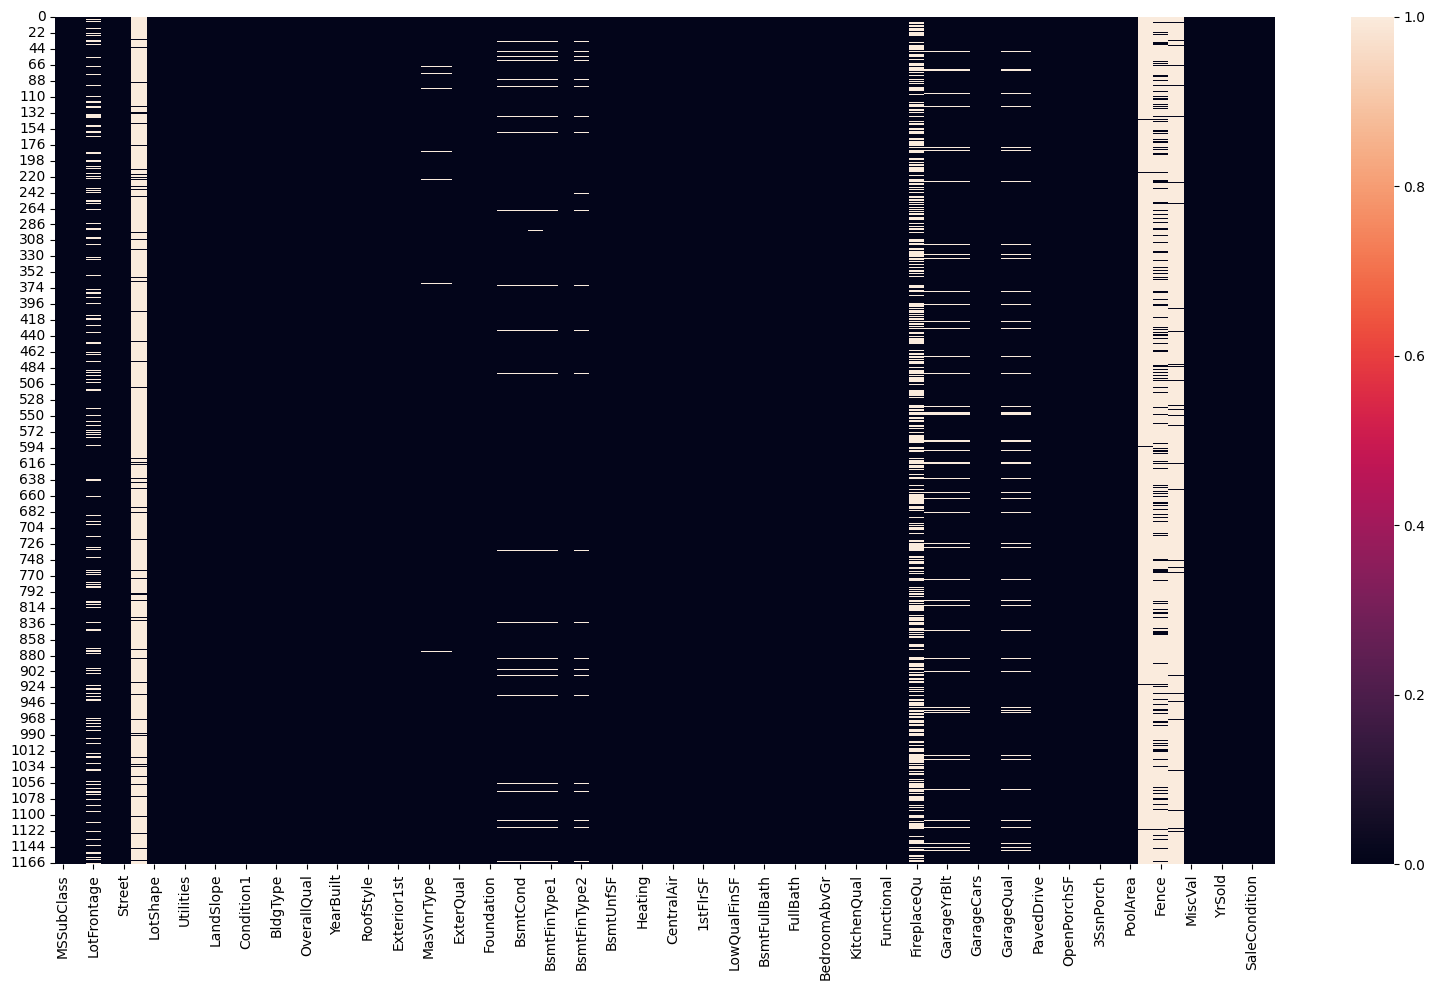

In [65]:
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [66]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                   1161       99.400685
MiscFeature              1124       96.232877
Alley                    1091       93.407534
Fence                     931       79.708904
FireplaceQu               551       47.174658
LotFrontage               214       18.321918
GarageCond                 64        5.479452
GarageQual                 64        5.479452
GarageType                 64        5.479452
GarageFinish               64        5.479452
GarageYrBlt                64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtCond                   30        2.568493
BsmtFinType1               30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
MSSubClass                  0        0.000000
Fireplaces                  0        0.000000
TotRmsAbvGrd                0     

- There are 18 features with NULL Values in the Dataset

#### Missing Values Imputation

##### PoolQC,MiscFeature, Alley, Fence, FireplaceQC

- The above features have more than 50% of missing data so we will drop the above features

In [67]:
df = df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1)

#### - Impuataion of Numerical Features 

##### - Imputation of LotFrontage

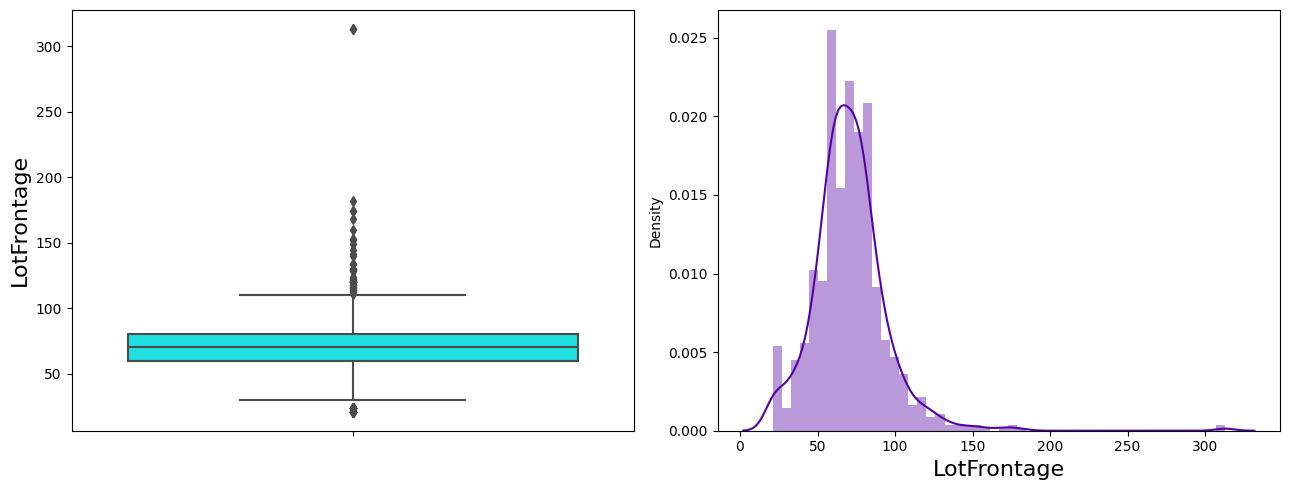

In [68]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'LotFrontage', data= df, color='cyan')
plt.ylabel('LotFrontage', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(df['LotFrontage'])
plt.xlabel('LotFrontage',fontsize=16)
plt.tight_layout()
plt.show()

In [69]:
print('Mean of LotFrontage:',df['LotFrontage'].mean())
print('Median of LotFrontage:',df['LotFrontage'].median())
missing_values_percent = (df['LotFrontage'].isna().sum() / df.shape[0]) * 100
print('Missing Value percentage: ',missing_values_percent)

Mean of LotFrontage: 70.98846960167715
Median of LotFrontage: 70.0
Missing Value percentage:  18.32191780821918


- There are Outliers in the LotFrontage feature so we cannot replace missing values with the mean since it is sensitive to outliers
- Replace Outliers with median

In [70]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

#### - Imputation of MasVnrArea

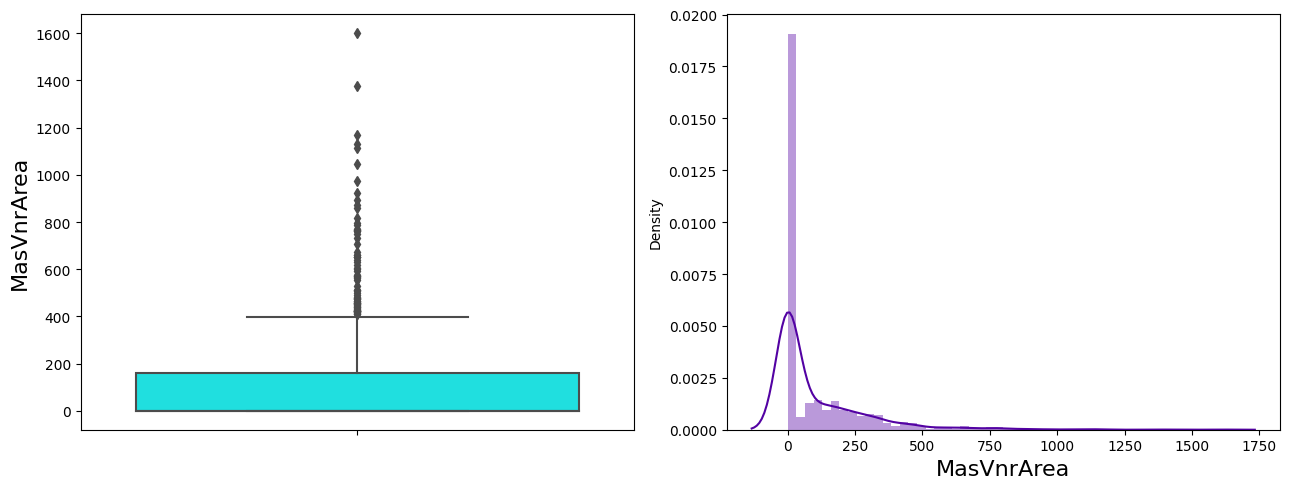

In [71]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'MasVnrArea', data= df, color='cyan')
plt.ylabel('MasVnrArea', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(df['MasVnrArea'])
plt.xlabel('MasVnrArea',fontsize=16)
plt.tight_layout()
plt.show()

In [72]:
print('Mean of MasVnrArea:',df['MasVnrArea'].mean())
print('Median of MasVnrArea:',df['MasVnrArea'].median())
missing_values_percent = (df['MasVnrArea'].isna().sum() / df.shape[0]) * 100
print('Missing Value percentage: ',missing_values_percent)

Mean of MasVnrArea: 102.31007751937985
Median of MasVnrArea: 0.0
Missing Value percentage:  0.5993150684931506


In [73]:
print('Mean of MasVnrArea:',df['MasVnrArea'].mean())
print('Median of MasVnrArea:',df['MasVnrArea'].median())

Mean of MasVnrArea: 102.31007751937985
Median of MasVnrArea: 0.0


In [74]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

####  Imputation of Categorical Varaiables with MODE

In [75]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [76]:
df.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

- There are no more Missing Values in the Dataset

### Test Data

In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   Alley          14 non-null     object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [78]:
missing_values = df_test.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df_test))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                    292      100.000000
MiscFeature               282       96.575342
Alley                     278       95.205479
Fence                     248       84.931507
FireplaceQu               139       47.602740
LotFrontage                45       15.410959
GarageType                 17        5.821918
GarageYrBlt                17        5.821918
GarageQual                 17        5.821918
GarageCond                 17        5.821918
GarageFinish               17        5.821918
BsmtCond                    7        2.397260
BsmtFinType2                7        2.397260
BsmtFinType1                7        2.397260
BsmtQual                    7        2.397260
BsmtExposure                7        2.397260
MasVnrArea                  1        0.342466
MasVnrType                  1        0.342466
Electrical                  1        0.342466
BedroomAbvGr                0        0.000000
BsmtHalfBath                0     

In [79]:
print('No. of Rows :',df_test.shape[0])
print('No. of Columns :', df_test.shape[1])

No. of Rows : 292
No. of Columns : 79


#### Missing Value Imputation in Test Dataset

In [80]:
# Removing columns with high missing value percentage
df_test= df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [81]:
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].median())
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageYrBlt']= df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['GarageFinish']= df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median())
df_test['Electrical'] = df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

In [82]:
df_test.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

- There are no more Missing Values in the Dataset

In [83]:
# Converting years column to age column
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_Since_Sold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [84]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [85]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL         70.0     4928   Pave      IR1         Lvl   
1          20       RL         95.0    15865   Pave      IR1         Lvl   
2          60       RL         92.0     9920   Pave      IR1         Lvl   
3          20       RL        105.0    11751   Pave      IR1         Lvl   
4          20       RL         70.0    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     1Story            6            5     Gable  CompShg     Plywood   
1     1Story            8            6      Flat  Tar&Grv     Wd Sdng   
2     2Story            7            5     Gable  CompShg     MetalSd   
3     1Story            6            6       Hip  CompShg     Plywood   
4     1Story            6            7     Gable  CompShg     CemntBd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Plywood       None         0.0        TA        TA     CBlock       Gd   
1     Wd Sdng       None         0.0        Gd        Gd      PConc       TA   
2     MetalSd       None         0.0        Gd        TA      PConc       Gd   
3     Plywood    BrkFace       480.0        TA        TA     CBlock       Gd   
4     CmentBd      Stone       126.0        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          ALQ         120          Unf           0   
1       Gd           Gd          ALQ         351          Rec         823   
2       TA           Av          GLQ         862          Unf           0   
3       TA           No          BLQ         705          Unf           0   
4       TA           No          ALQ        1246          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        958         1078    GasA        TA          Y      SBrkr       958   
1       1043         2217    GasA        Ex          Y      SBrkr      2217   
2        255         1117    GasA        Ex          Y      SBrkr      1127   
3       1139         1844    GasA        Ex          Y      SBrkr      1844   
4        356         1602    GasA        Gd          Y      SBrkr      1602   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0        958             0             0         2   
1         0             0       2217             1             0         2   
2       886             0       2013             1             0         2   
3         0             0       1844             0             0         2   
4         0             0       1602             0             1         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         0             2             1          TA             5        Typ   
1         0             4             1          Gd             8        Typ   
2         1             3             1          TA             8        Typ   
3         0             3             1          TA             7        Typ   
4         0             3             1          Gd             8        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           1     Attchd          RFn           2         440         TA   
1           1     Attchd          Unf           2         621         TA   
2           1     Attchd          U

In [86]:
df.shape

(1168, 75)

In [87]:
# For Test Data
# Converting years column to age column
df_test['Year_SinceBuilt'] = df_test['YearBuilt'].max() - df_test['YearBuilt']
df_test['Year_SinceRemodAdded'] = df_test['YearRemodAdd'].max() - df_test['YearRemodAdd']
df_test['Year_Since_Sold'] = df_test['YrSold'].max() - df_test['YrSold']
df_test['GarageAge'] = df_test['GarageYrBlt'].max() - df_test['GarageYrBlt']

In [88]:
df_test.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [89]:
df_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL         86.0    14157   Pave      IR1         HLS   
1         120       RL         65.0     5814   Pave      IR1         Lvl   
2          20       RL         65.0    11838   Pave      Reg         Lvl   
3          70       RL         75.0    12000   Pave      Reg         Bnk   
4          60       RL         86.0    14598   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Corner       Gtl      StoneBr       Norm       Norm     1Fam   
1    AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     1Story            9            5       Hip  CompShg     VinylSd   
1     1Story            8            5     Gable  CompShg     HdBoard   
2     1Story            8            5       Hip  CompShg     VinylSd   
3     2Story            7            7     Gable  CompShg     MetalSd   
4     2Story            6            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd      Stone       200.0        Gd        TA      PConc       Ex   
1     HdBoard       None         0.0        Gd        TA     CBlock       Gd   
2     VinylSd       None         0.0        Gd        TA      PConc       Gd   
3     MetalSd       None         0.0        TA        TA     CBlock       TA   
4     VinylSd      Stone        74.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           Gd          GLQ        1249          Unf           0   
1       TA           Av          GLQ        1036          Unf           0   
2       TA           Av          Unf           0          Unf           0   
3       TA           No          Rec         275          Unf           0   
4       TA           Mn          Unf           0          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        673         1922    GasA        Ex          Y      SBrkr      1922   
1        184         1220    GasA        Gd          Y      SBrkr      1360   
2       1753         1753    GasA        Ex          Y      SBrkr      1788   
3        429          704    GasA        Ex          Y      SBrkr       860   
4        894          894    GasA        Ex          Y      SBrkr       894   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0       1922             1             0         2   
1         0             0       1360             1             0         1   
2         0             0       1788             0             0         2   
3       704             0       1564             0             0         1   
4      1039             0       1933             0             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         0             3             1          Gd             8        Typ   
1         0             1             1          Gd             4        Typ   
2         0             3             1          Ex             7        Typ   
3         1             3             1          Fa             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           1     Attchd          Fin           3         676         TA   
1           1     Attchd          RFn           2         565         TA   
2           1     Attchd          R

#### Exploratory Data Analysis

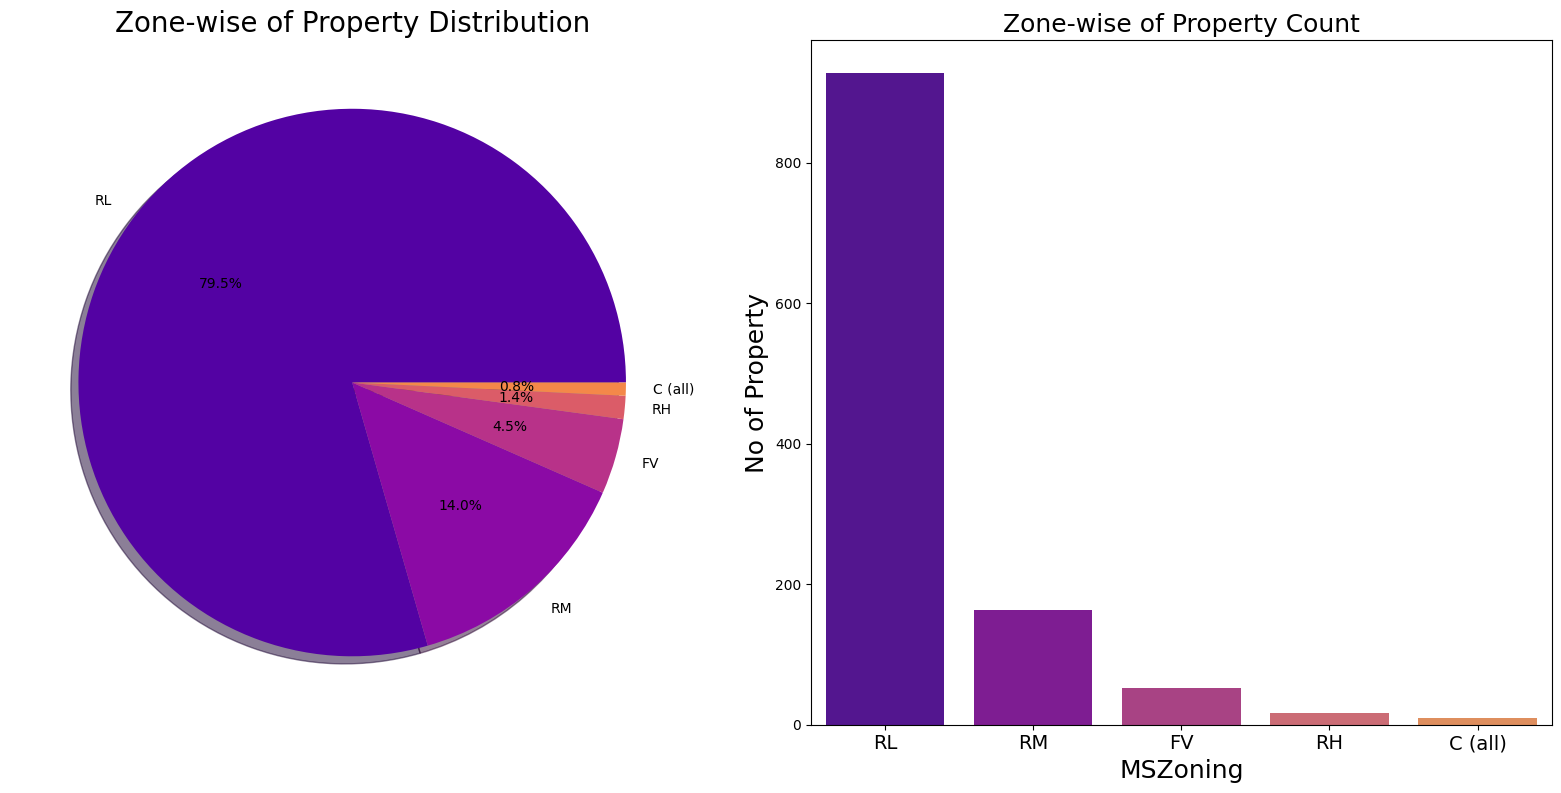

In [90]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Zone-wise of Property Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('MSZoning',data=df,ax=ax[1])
ax[1].set_title('Zone-wise of Property Count',fontsize=18)
ax[1].set_xlabel("MSZoning",fontsize=18)
ax[1].set_ylabel("No of Property",fontsize=18)
plt.xticks(fontsize=14)
plt.show()

Observation:
- 79.5% of House properties belongs to Low Density Residential Area followed by 14 % of properties belong to Medium Density Residential Area.
- Very Few property (0.8%) belongs to Commerical zone.

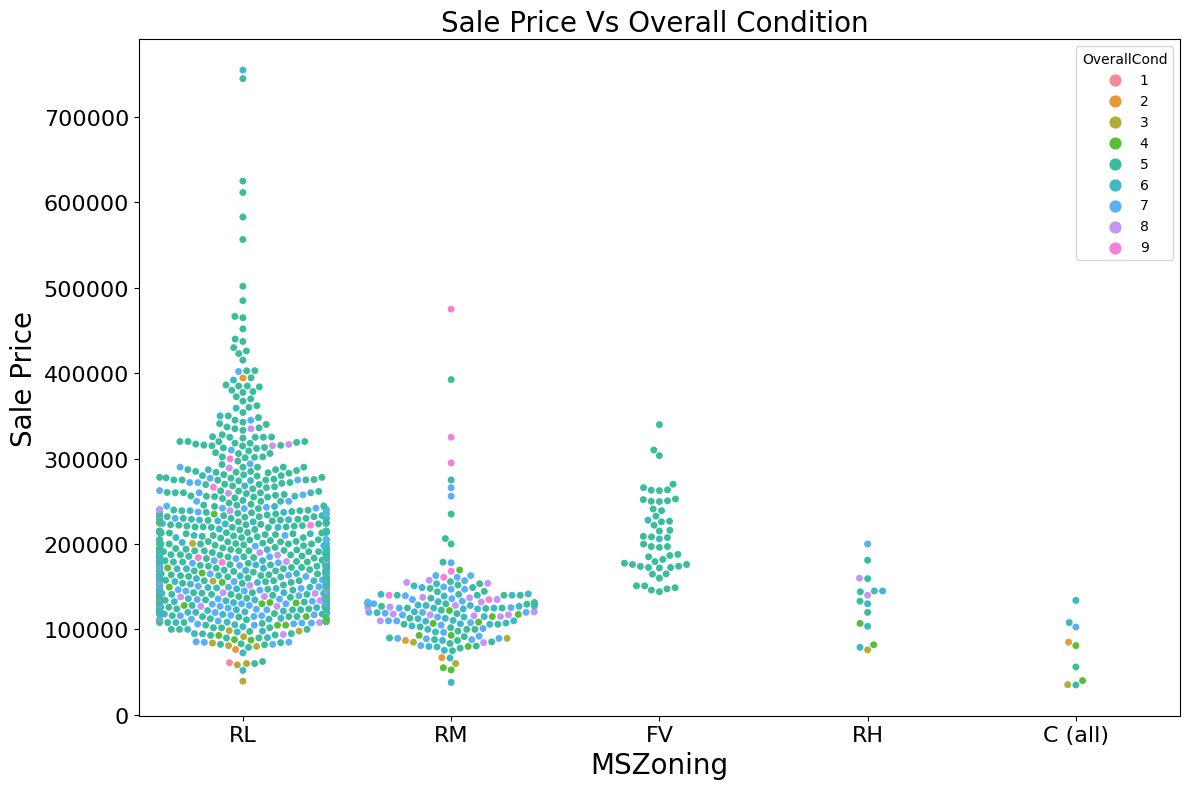

In [91]:
plt.rcParams['figure.autolayout']= True
plt.figure(figsize=(12,8))
sns.swarmplot(y=df['SalePrice'], x=df['MSZoning'], hue = df['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20)
plt.xlabel('MSZoning',fontsize = 20,)
plt.ylabel('Sale Price',fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Observation :
- We already know of 80% of housing data belongs to Low density Residential Area and Now we can see in Swramplot that Sale Price inside RL Zone is much higher than other remaining zone.
- Cheapest properties are available in Commerical zone.
- Another interesting observation we get here is for some house properties having Overall condition Rating of 8 & 9 have low price compare to others. This indicate that Overall Condition Rating is Not significant factor in determination of Sale price. Overall Condition Rating may helpful to buyer in taking decision of Buying property but not in determination of House Price.
- *There may be other factors like Street Size or House Size may have major correlation with Sale Price.*

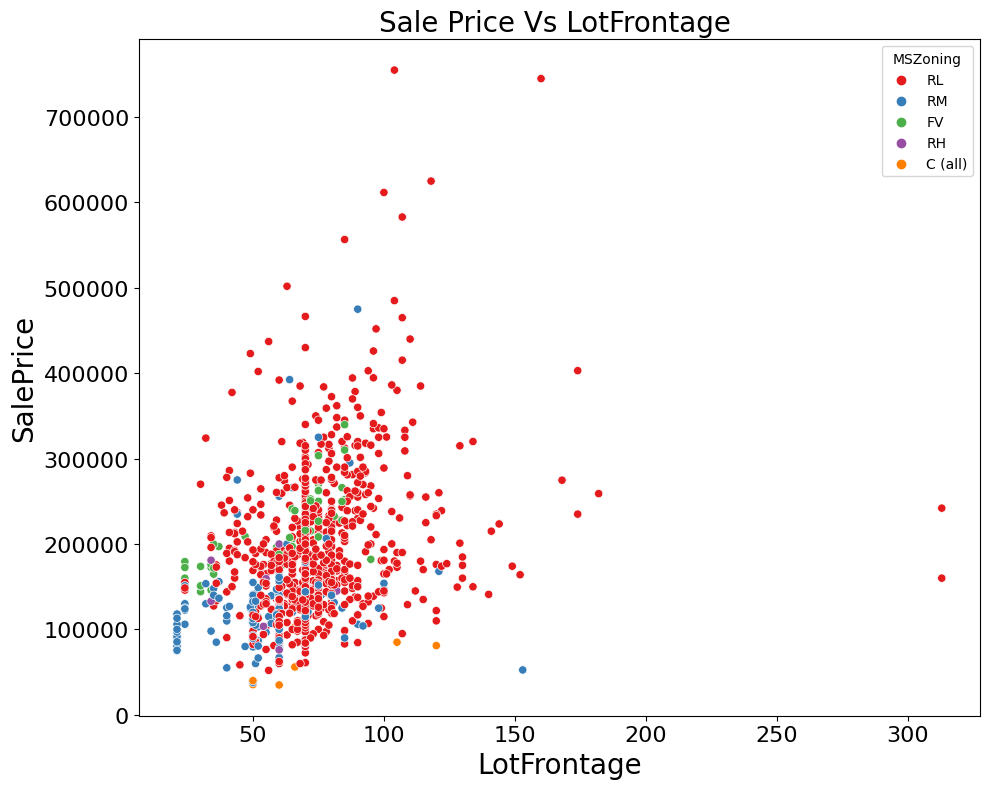

In [92]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(10,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotFrontage'], hue =df['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20)
plt.xlabel('LotFrontage',fontsize = 20)
plt.ylabel('SalePrice',fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- As LotForntage increases the Price of the House also increases

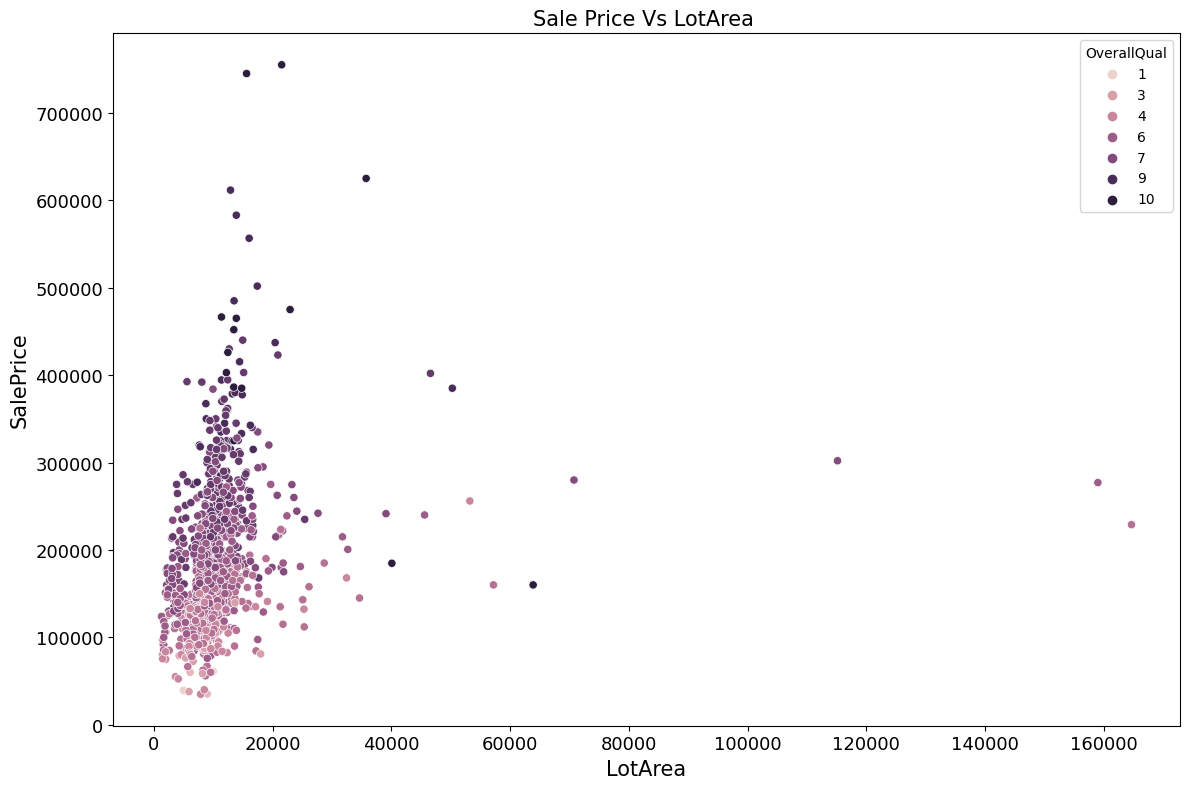

In [93]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['SalePrice'], x=df['LotArea'], hue =df['OverallQual'])
plt.title("Sale Price Vs LotArea ",fontsize=15)
plt.xlabel('LotArea',fontsize = 15)
plt.ylabel('SalePrice',fontsize = 15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()

- There seems to be no particular relation between LotArea and SalePrice

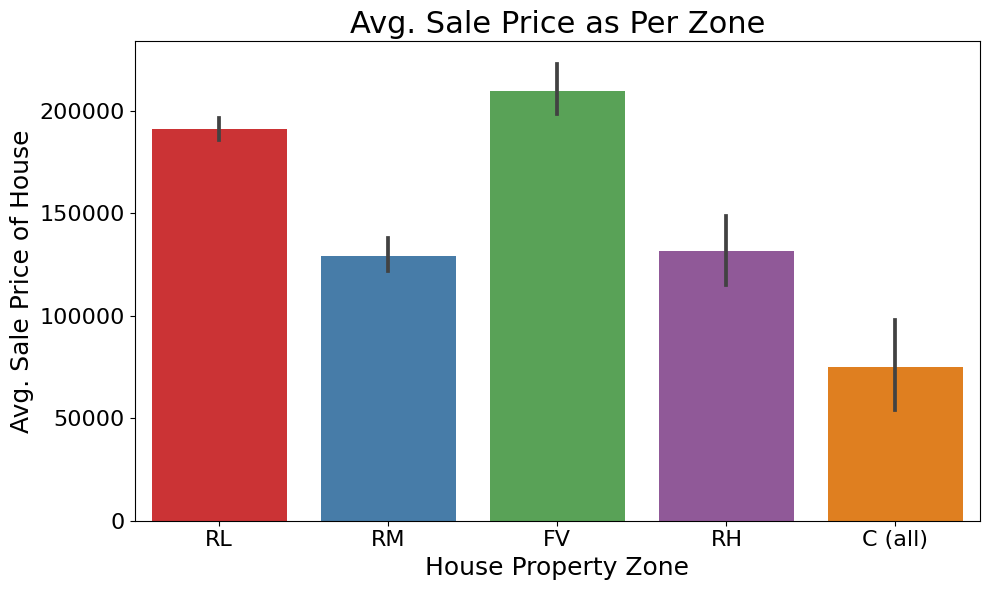

In [94]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette("Set1")
plt.figure(figsize = (10,6))
sns.barplot(y = df['SalePrice'], x= df['MSZoning'])
plt.title('Avg. Sale Price as Per Zone', fontsize=22)
plt.xlabel('House Property Zone', fontsize= 18)
plt.ylabel('Avg. Sale Price of House', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- In terms of Average Sale price house properties belonging to Floating Village Residential Zone are costiler than rest

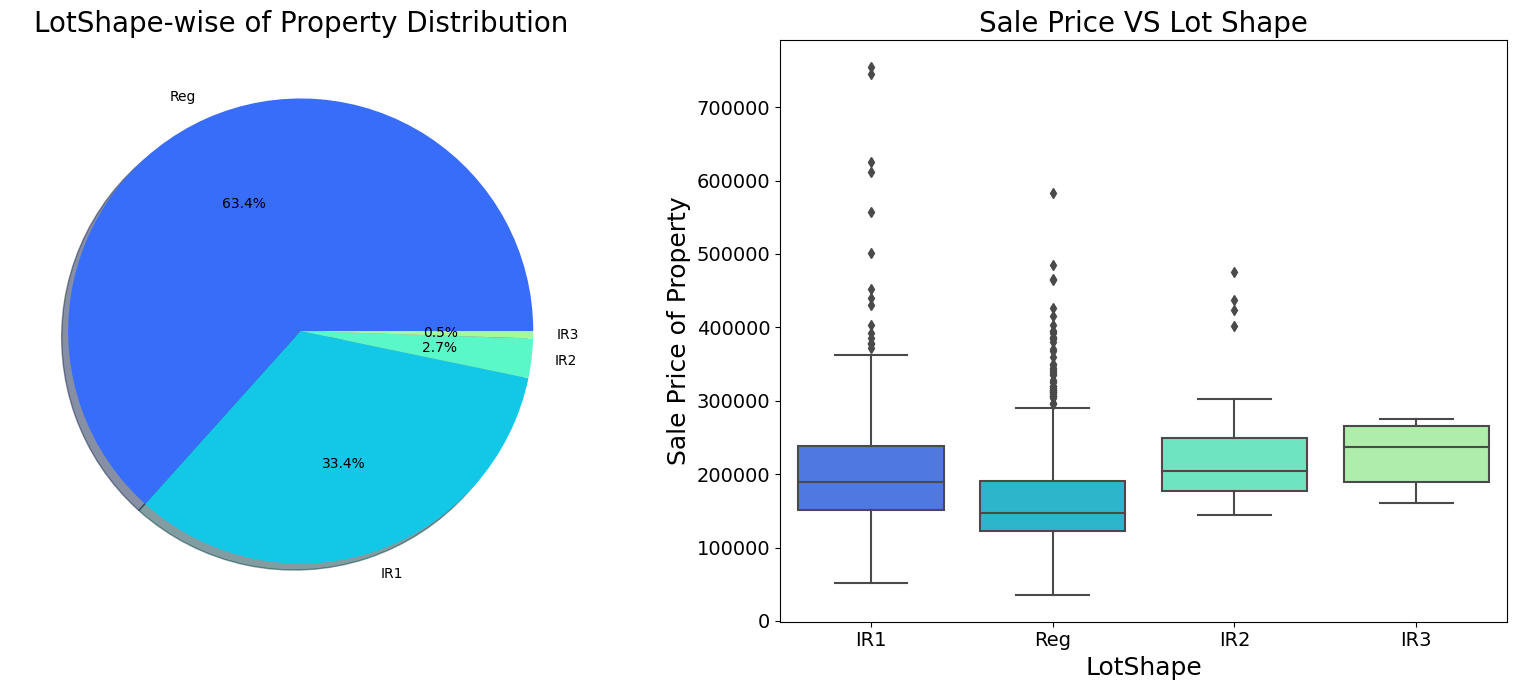

In [95]:
# Exploring LotShape Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotShape'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('LotShape-wise of Property Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotShape'], ax=ax[1])
ax[1].set_title('Sale Price VS Lot Shape',fontsize=20)
ax[1].set_xlabel("LotShape",fontsize=18)
ax[1].set_ylabel("Sale Price of Property",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Regualar Shaped have the Largest containing 63.4%
- Sale Price of property with slight irregular shape is higher than regular shape.

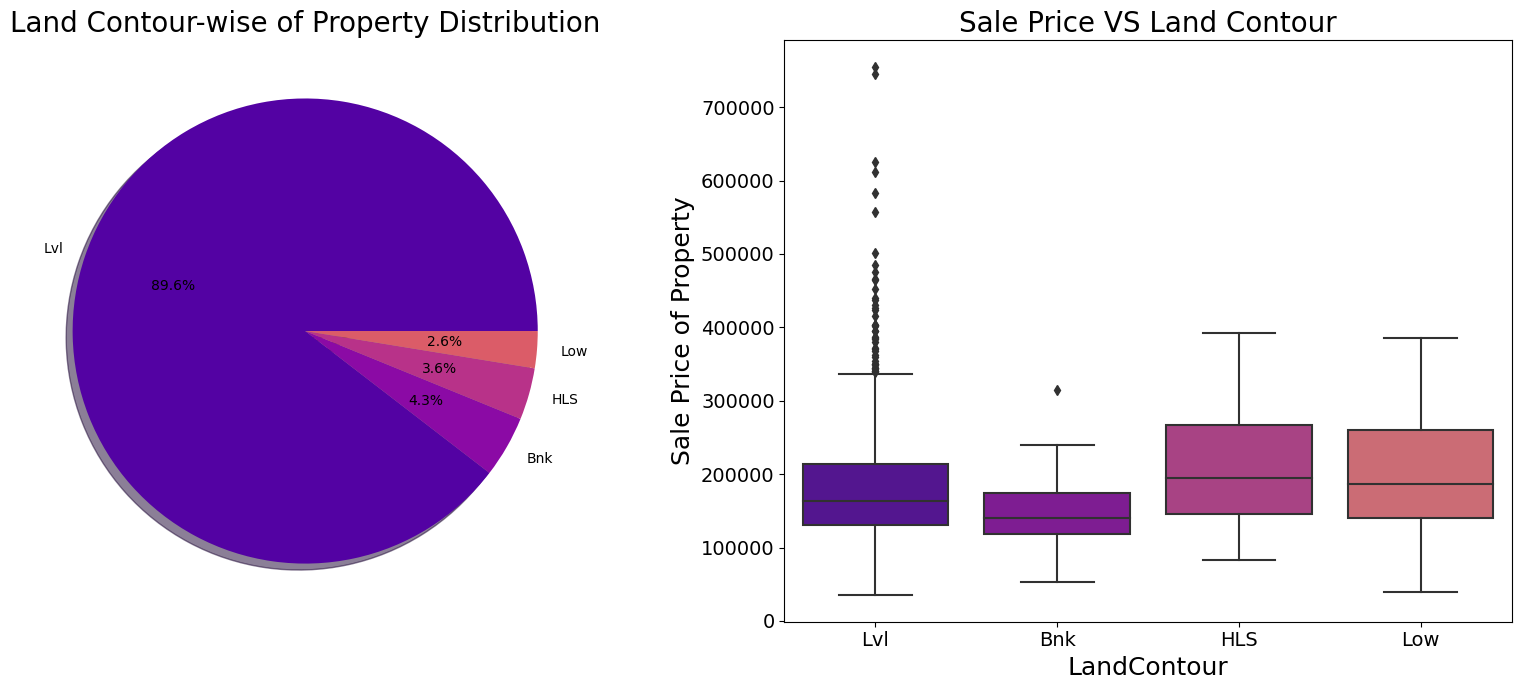

In [96]:
# Exploring LandContour Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandContour'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Land Contour-wise of Property Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandContour'], ax=ax[1])
ax[1].set_title('Sale Price VS Land Contour',fontsize=20)
ax[1].set_xlabel("LandContour",fontsize=18)
ax[1].set_ylabel("Sale Price of Property",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- FLat level consists of 89.6%
- Price for Flat level Contour is much higher

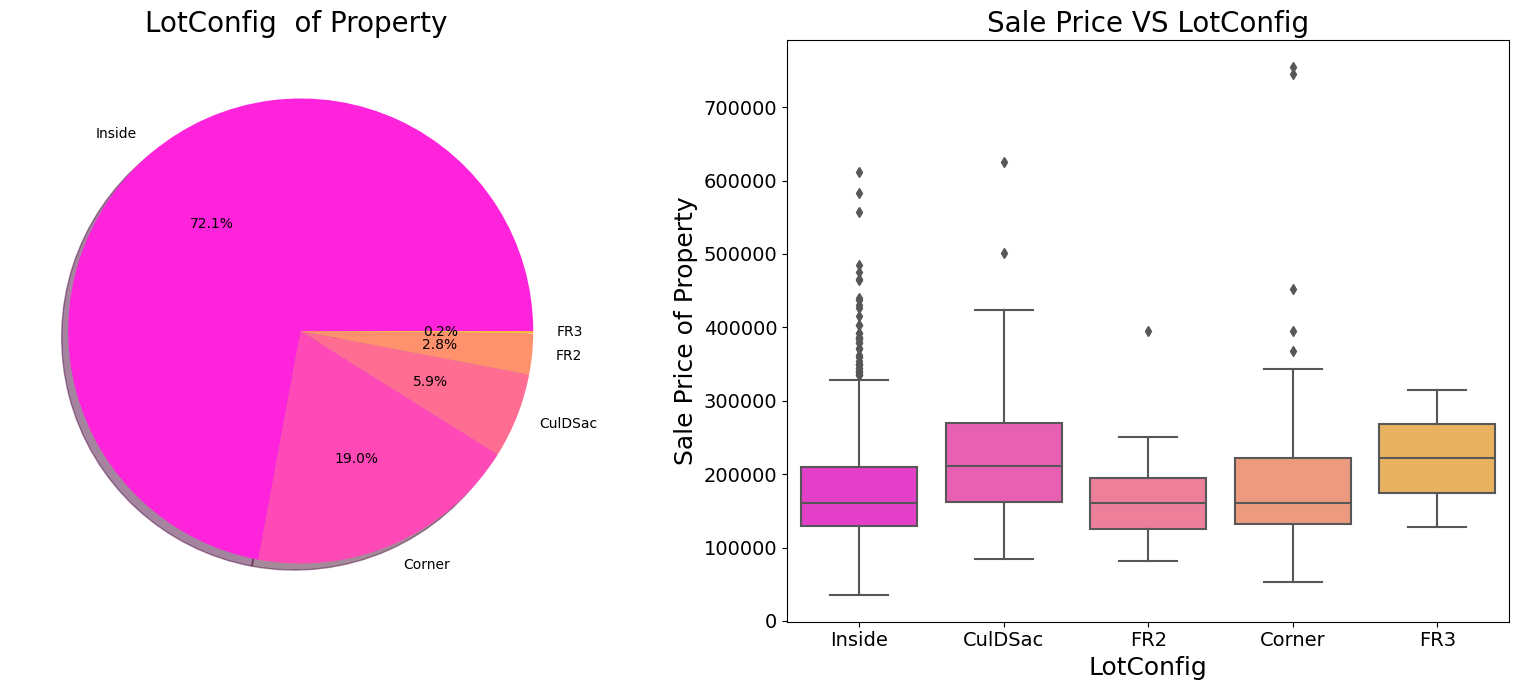

In [106]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LotConfig'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('LotConfig  of Property ', fontsize=20)
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LotConfig'], ax=ax[1])
ax[1].set_title('Sale Price VS LotConfig',fontsize=20)
ax[1].set_xlabel("LotConfig",fontsize=18)
ax[1].set_ylabel("Sale Price of Property",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- 72% percent belong to houses with inside lot conifguration
- They are also Cheaper than the rest 

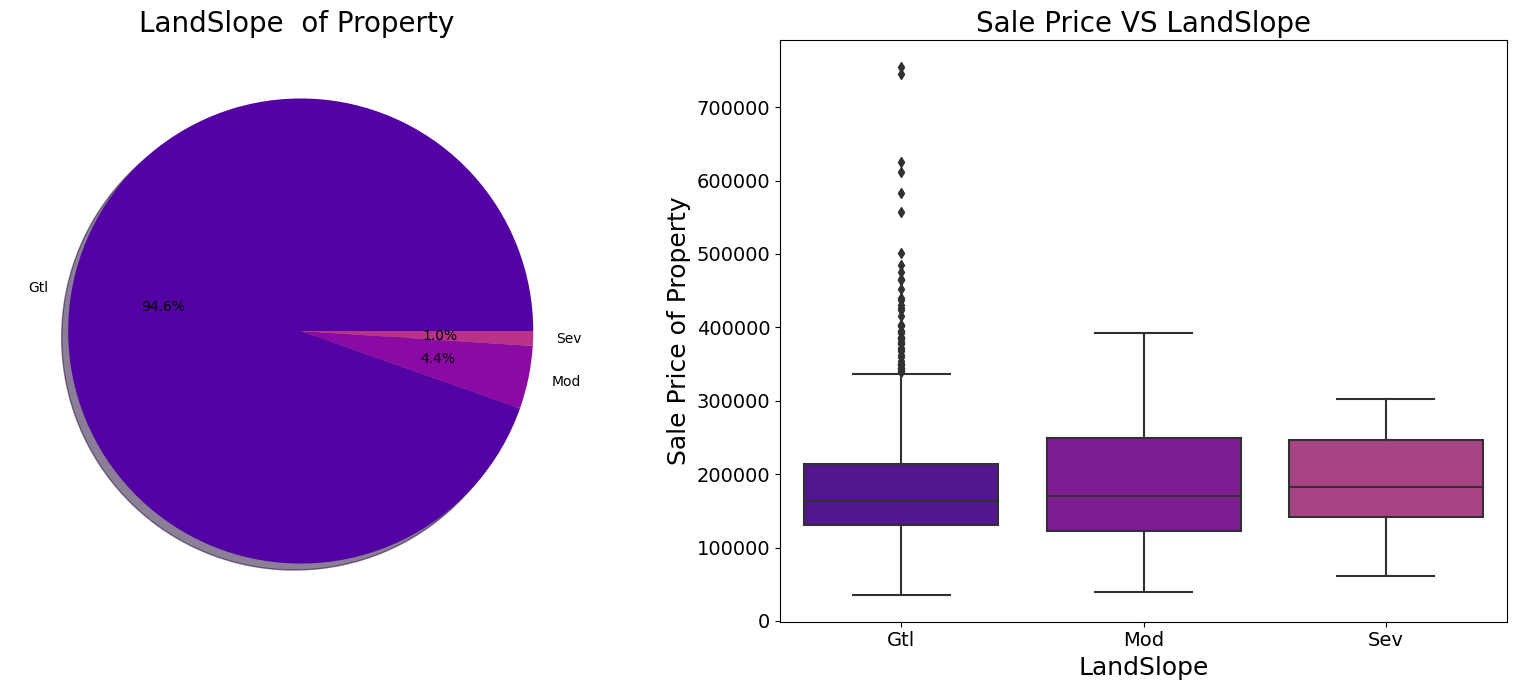

In [98]:
# Exploring LandSlope Type
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,7))
df['LandSlope'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('LandSlope  of Property ', fontsize=20)
ax[0].set_ylabel('')
sns.boxplot(y=df['SalePrice'], x=df['LandSlope'], ax=ax[1])
ax[1].set_title('Sale Price VS LandSlope',fontsize=20)
ax[1].set_xlabel("LandSlope",fontsize=18)
ax[1].set_ylabel("Sale Price of Property",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- As Land Slope increases SalePrice Dereases

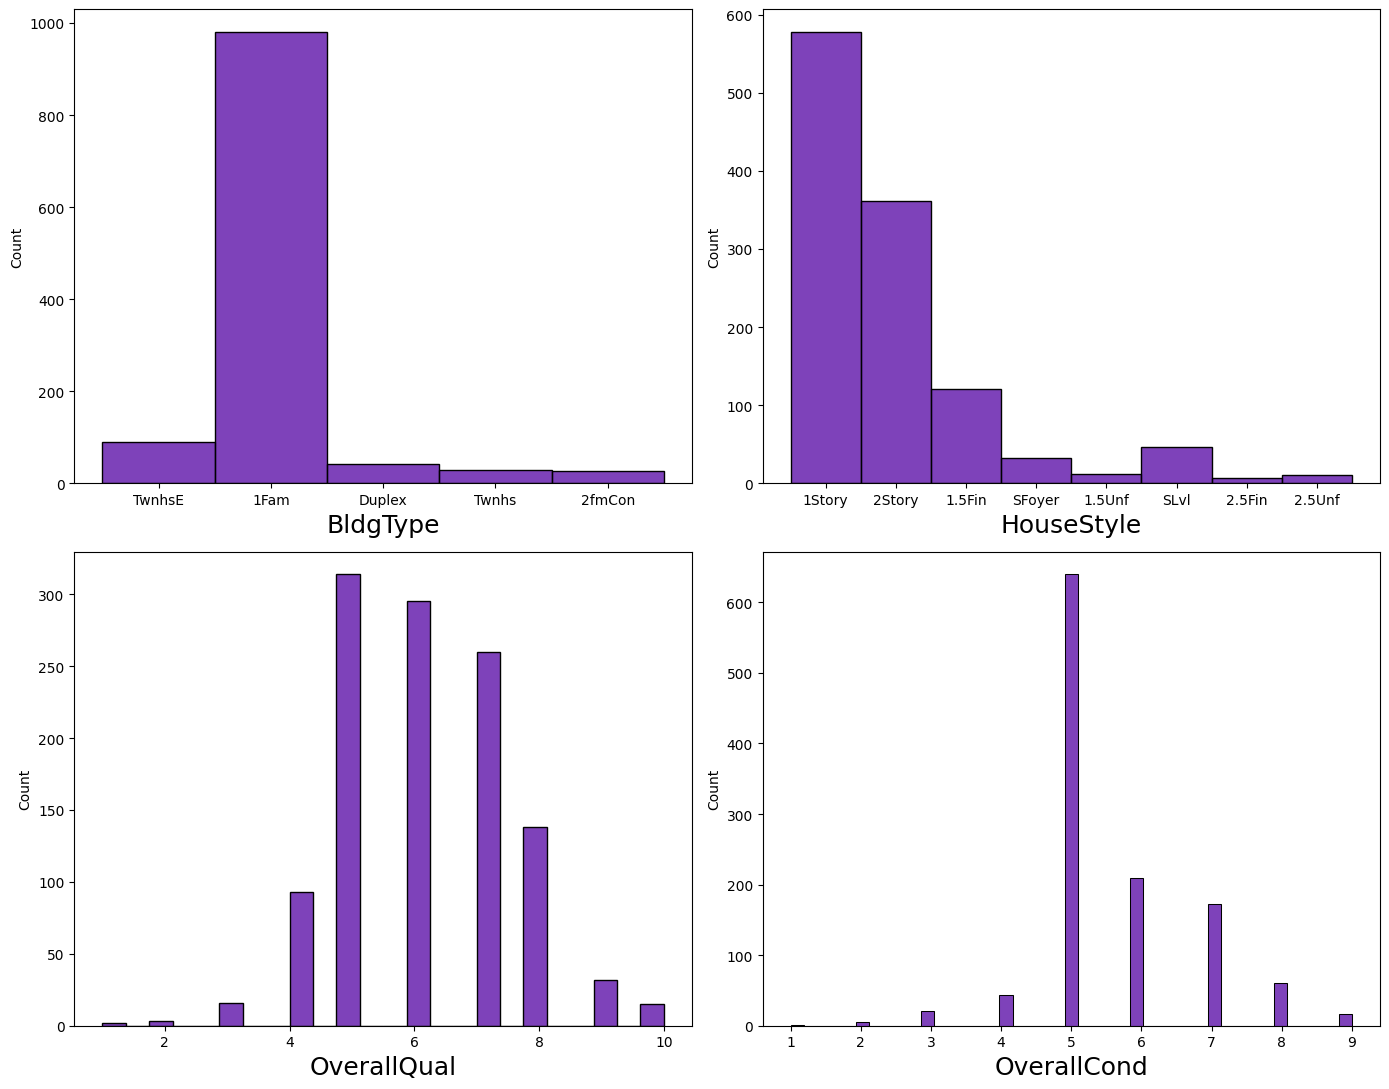

In [99]:
Conditions = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]
plt.figure(figsize=(14,11))
plotnumber=1

for i in Conditions:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot( df[i])
        plt.xlabel(i,fontsize=18)
        plt.xticks()
        plt.yticks()
    plotnumber+=1
plt.tight_layout()
plt.show()


- More than 950 house properties are with building type Single-family Detached
- More than 50% of house properties comes with Overall Condition Rating of 5.
- More than 75% of house properties come with overall Quality Rating varies between 5 to 6.
- More than 500 House Properties comes with one story dwelling.

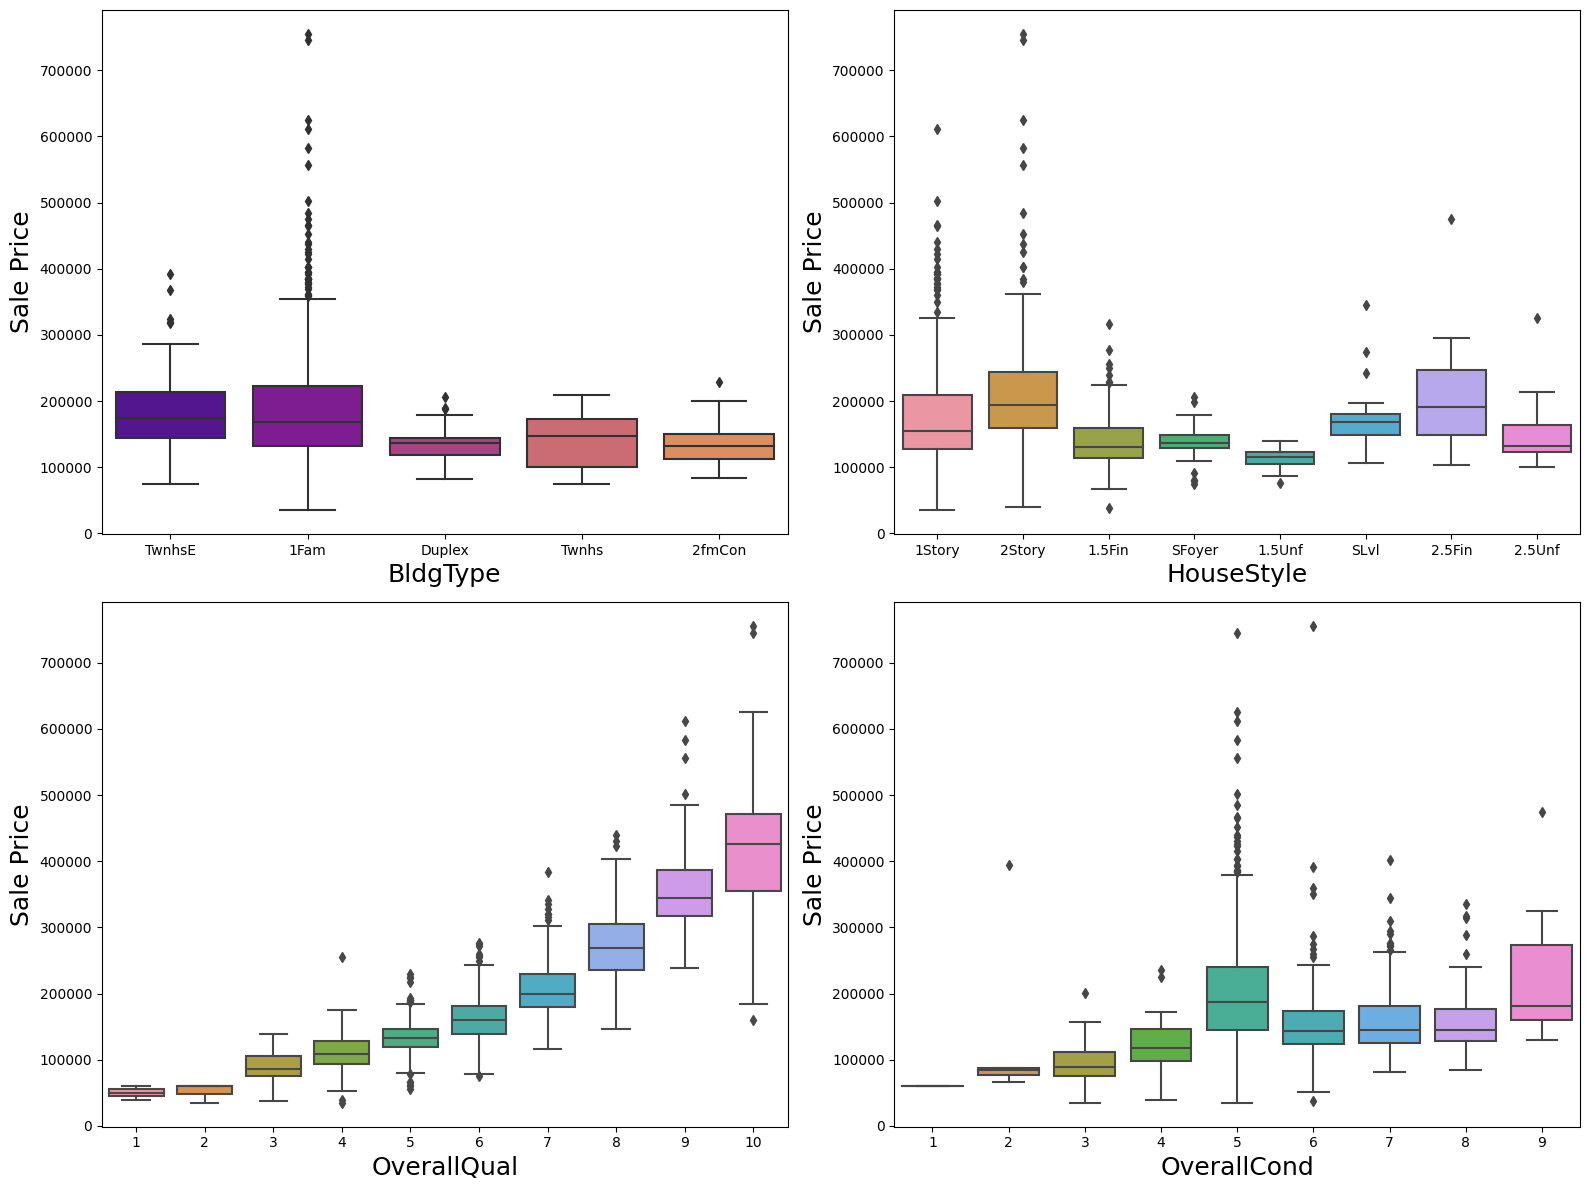

In [100]:
plt.figure(figsize=(16,12))
plotnumber=1

for i in Conditions:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18)
        plt.ylabel('Sale Price', fontsize =18)
    plotnumber+=1
plt.tight_layout()
plt.show()

- AS Quality increases the SalePrice Increases

In [101]:
Temporal_Vraibles = ["Year_SinceBuilt", "Year_SinceRemodAdded", 'Year_Since_Sold', "GarageAge"]

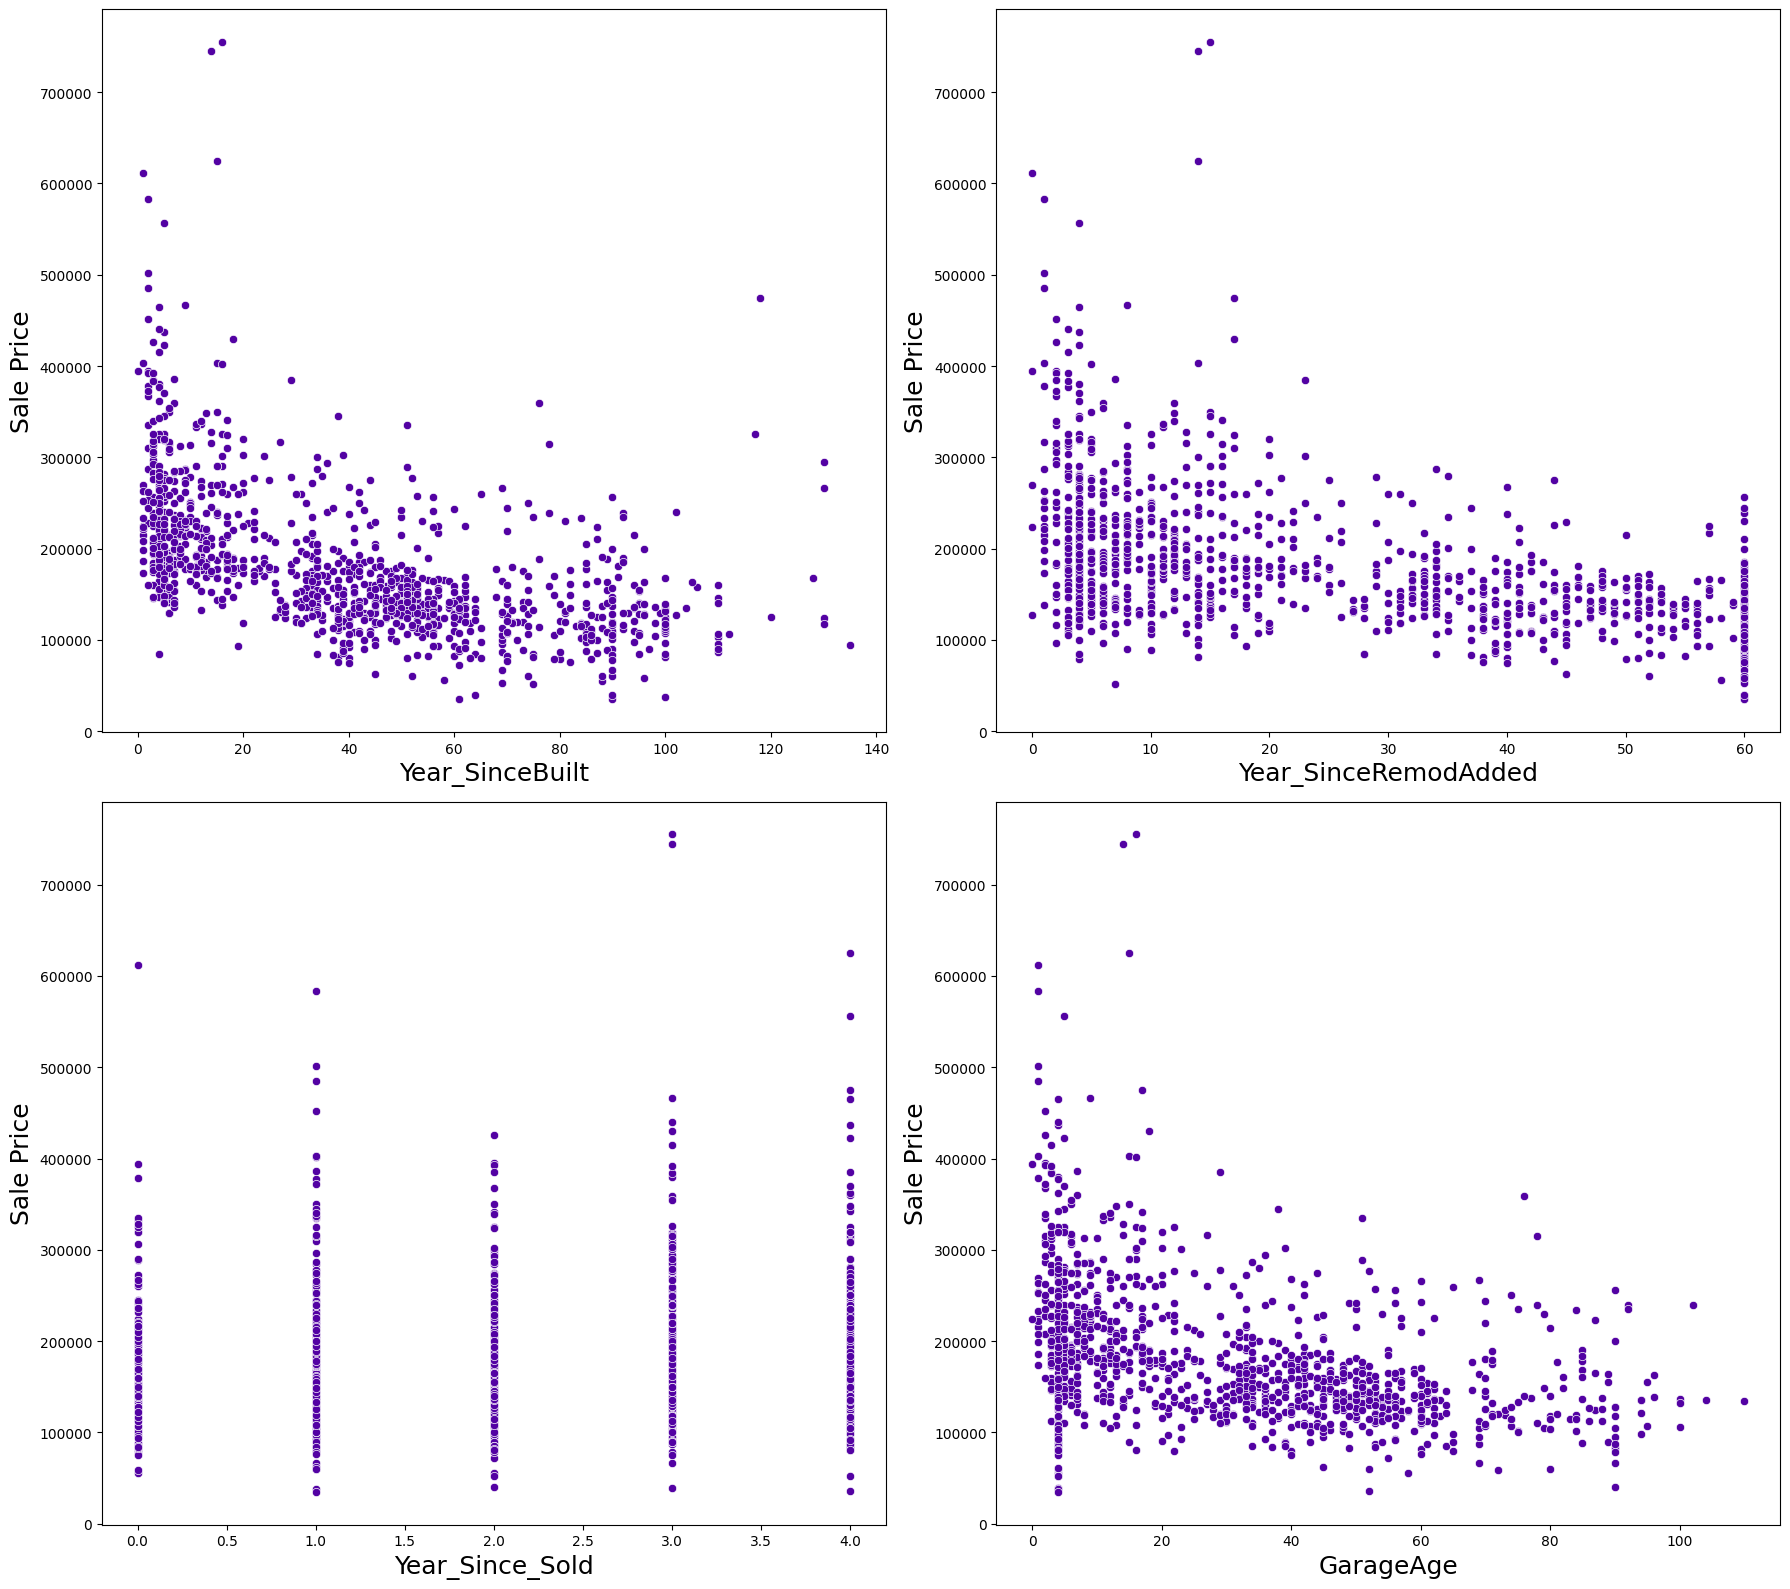

In [102]:
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in Temporal_Vraibles:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18)
        plt.ylabel('Sale Price', fontsize =18)
    plotnumber+=1
plt.tight_layout()
plt.show()

- If the RPoperty gets too old the SalePrice decreases
- The more the Age of Garage the lesser the SalePrice

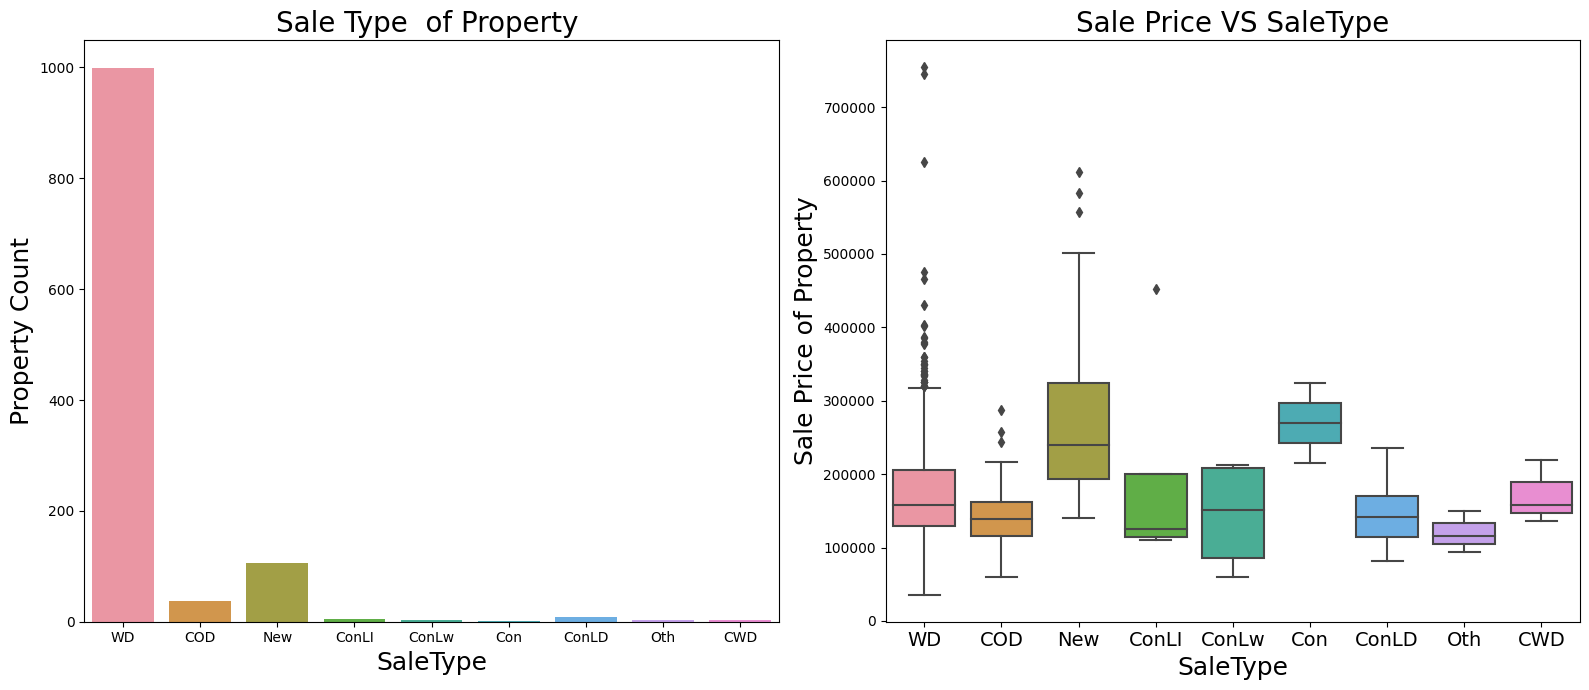

In [103]:
# Exploring SaleType Type
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleType',data=df,ax=ax[0])
ax[0].set_title('Sale Type  of Property ', fontsize=20)
ax[0].set_ylabel('Property Count', fontsize=18)
ax[0].set_xlabel('SaleType', fontsize=18)
plt.xticks(fontsize=14)
sns.boxplot(y=df['SalePrice'], x=df['SaleType'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleType',fontsize=20)
ax[1].set_xlabel("SaleType",fontsize=18)
ax[1].set_ylabel("Sale Price of Property",fontsize=18)
plt.show()

- Almost 1000 Sale happens in Warranty Deed
- All loan based sale are below 300000.

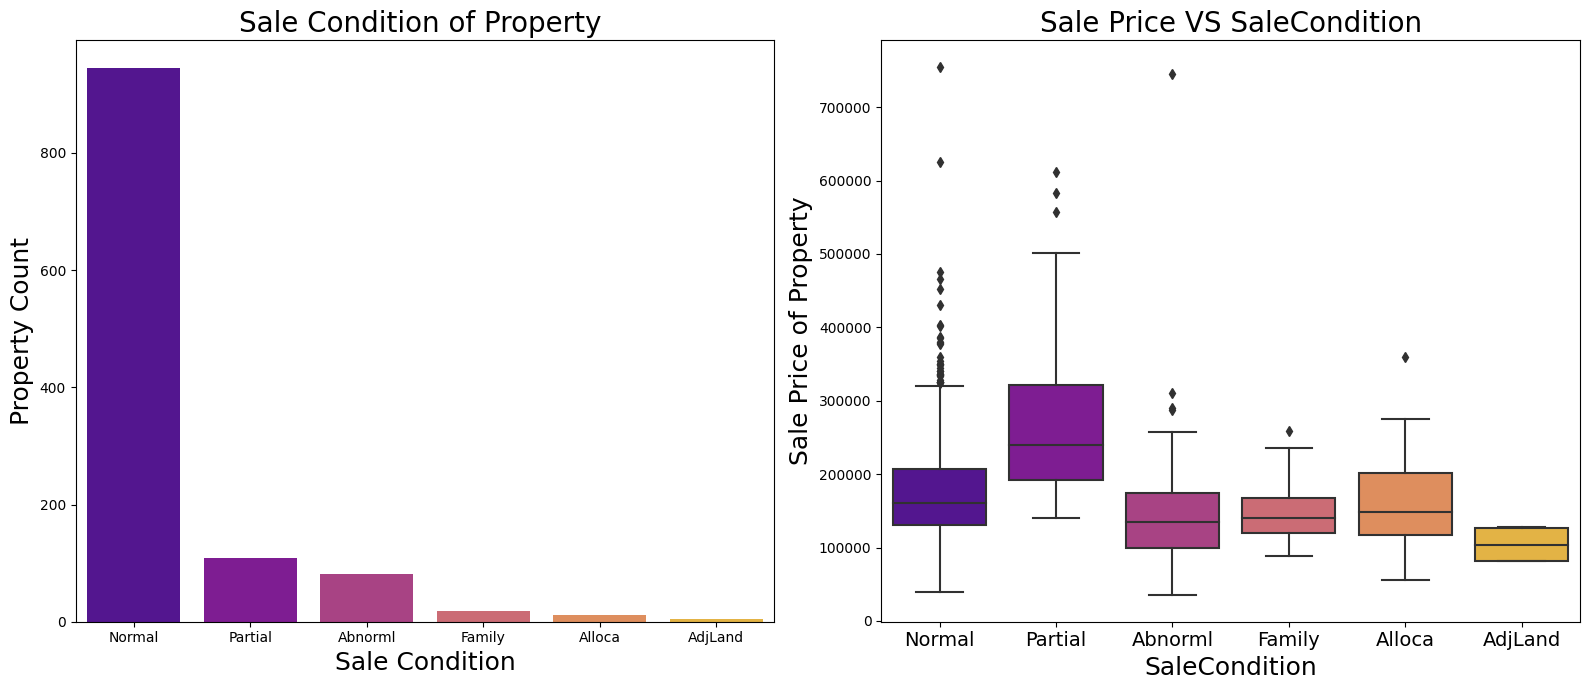

In [104]:
# Exploring SaleCondition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleCondition',data=df,ax=ax[0])
ax[0].set_title('Sale Condition of Property ', fontsize=20)
ax[0].set_ylabel('Property Count', fontsize=18)
ax[0].set_xlabel('Sale Condition', fontsize=18)
plt.xticks(fontsize=14)
sns.boxplot(y=df['SalePrice'], x=df['SaleCondition'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleCondition',fontsize=20)
ax[1].set_xlabel("SaleCondition",fontsize=18)
ax[1].set_ylabel("Sale Price of Property",fontsize=18)
plt.show()

- Maximum Base Price for House comes from Partial category- Home was not completed when last assessed (associated with New Homes) is higher than rest.
- Minimum base price comes from Normal condition sale and also highest sale price comes from this category.

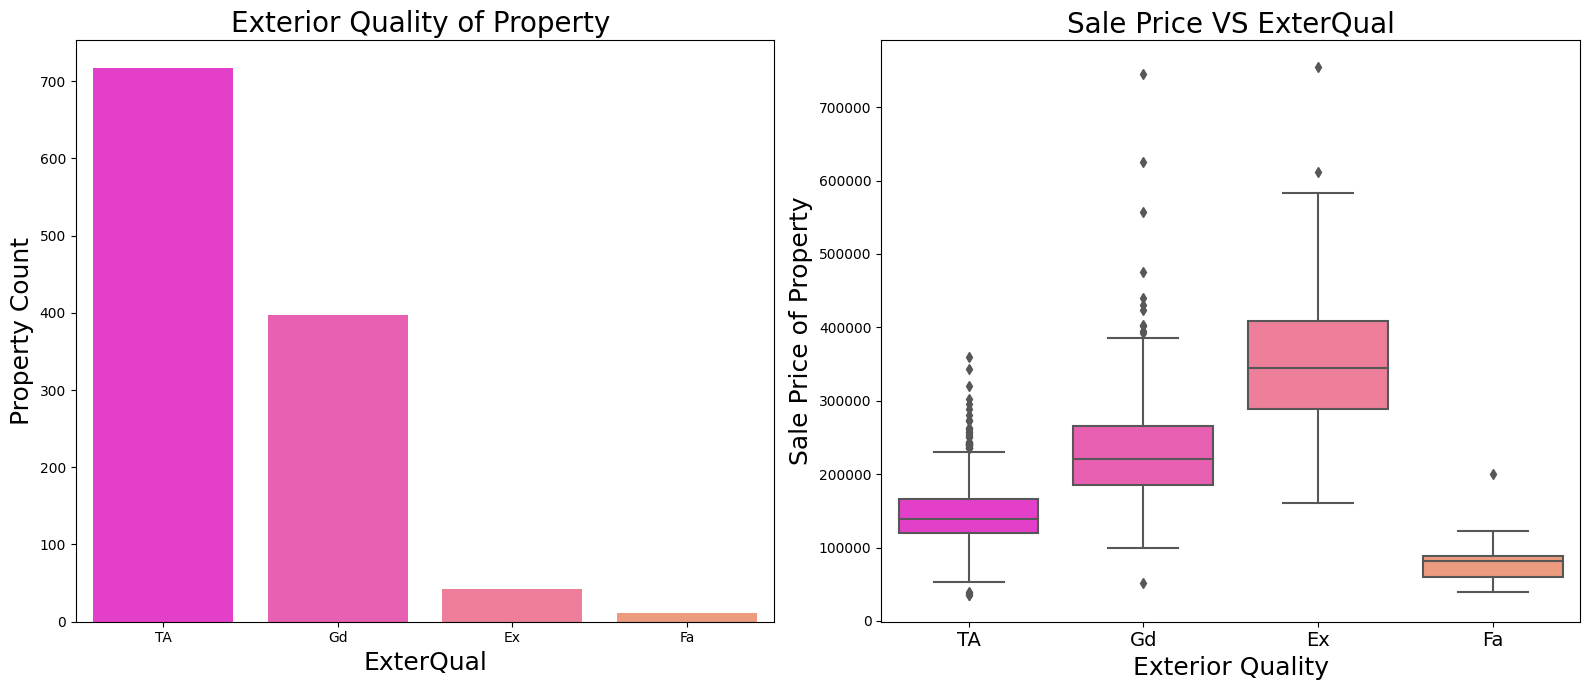

In [105]:
# Exploring ExterQual Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('spring')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('ExterQual',data=df,ax=ax[0])
ax[0].set_title('Exterior Quality of Property ', fontsize=20)
ax[0].set_ylabel('Property Count', fontsize=18)
ax[0].set_xlabel('ExterQual', fontsize=18)
plt.xticks(fontsize=14)
sns.boxplot(y=df['SalePrice'], x=df['ExterQual'], ax=ax[1])
ax[1].set_title('Sale Price VS ExterQual',fontsize=20)
ax[1].set_xlabel("Exterior Quality",fontsize=18)
ax[1].set_ylabel("Sale Price of Property",fontsize=18)
plt.show()

- Almost 60% of house properties come with Average Exterior quality and all of them below 400000.
- Very few House Properties comes with Excellent Exterior Quality.
- HIgher Cost house properties come with Good & Excellent exterior quality.

In [107]:
Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

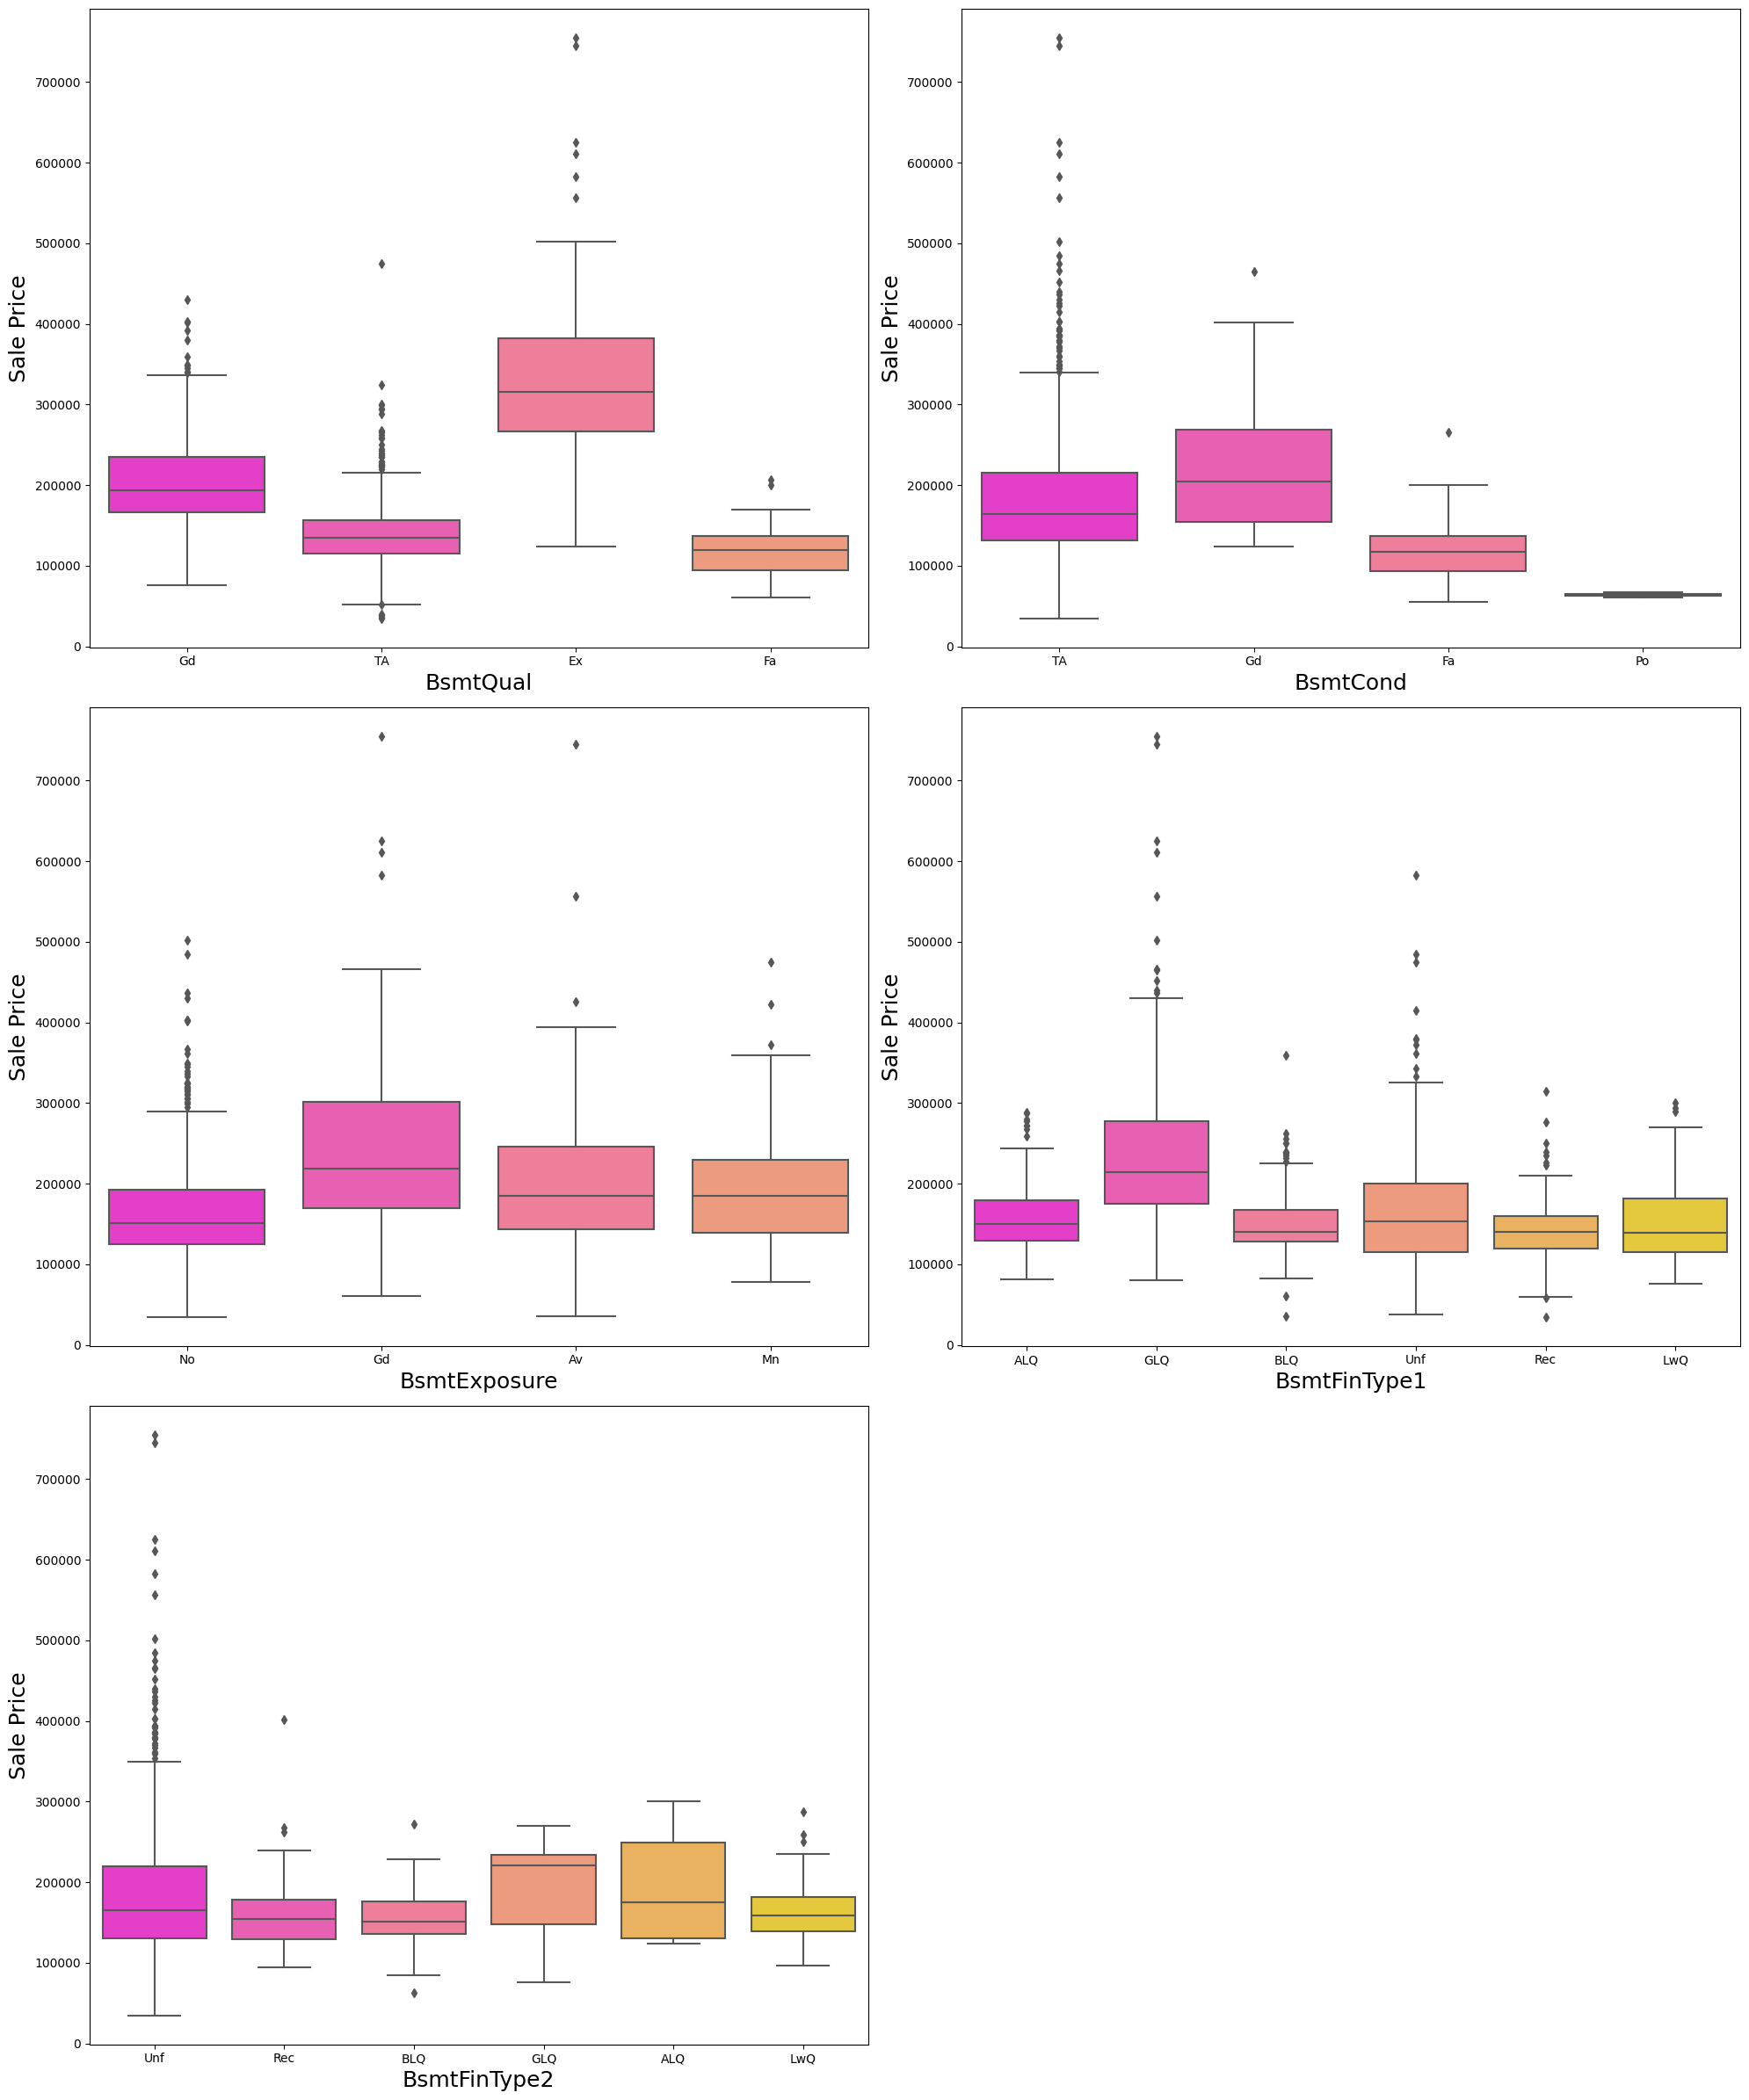

In [108]:
plt.figure(figsize=(20,24),facecolor='white')
plotnumber=1
for i in Bsmt:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(y = df['SalePrice'], x= df[i])
        plt.xlabel(i,fontsize=18)
        plt.ylabel('Sale Price', fontsize =18)
    plotnumber+=1
plt.tight_layout()
plt.show()

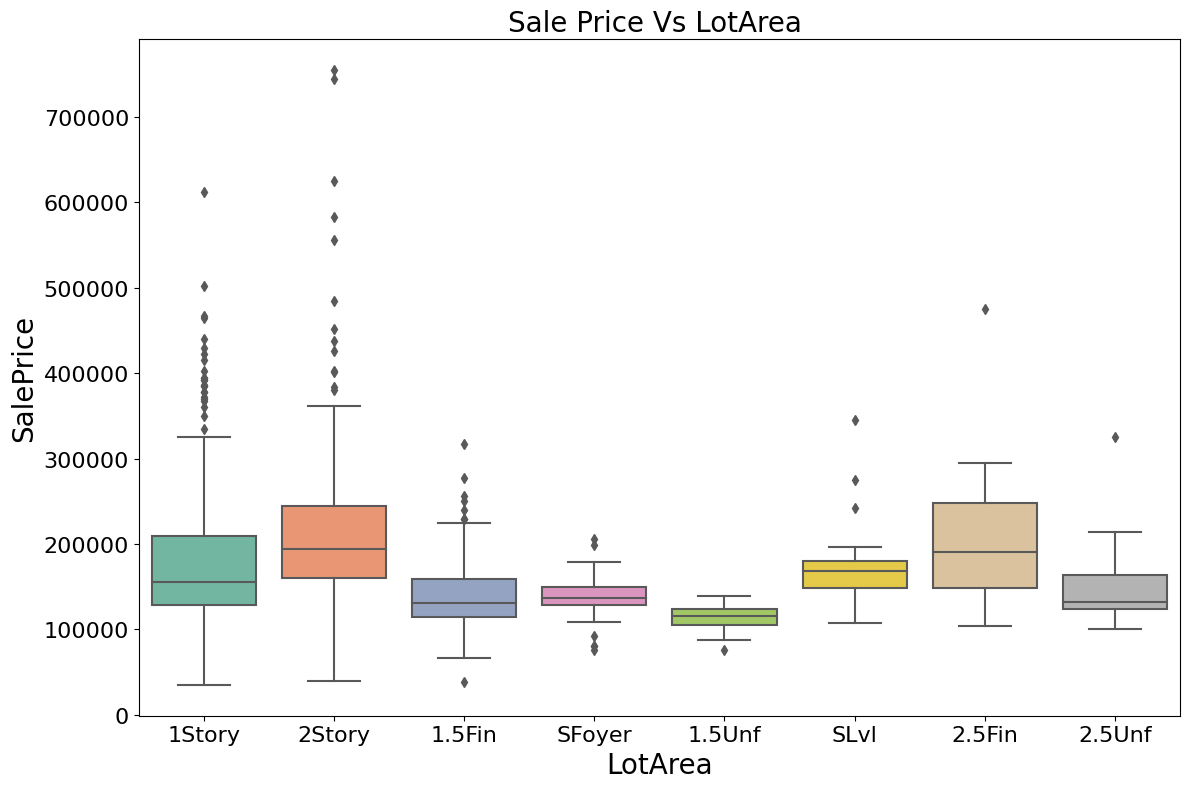

In [109]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set2')
plt.figure(figsize=(12,8))
sns.boxplot(y=df['SalePrice'], x=df['HouseStyle'])
plt.title("Sale Price Vs LotArea ",fontsize=20)
plt.xlabel('LotArea',fontsize = 20)
plt.ylabel('SalePrice',fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- 2 Story Houses are Costlier than Other 

In [110]:
Numerical_features = [i for i in df.columns if df[i].dtype != 'O']

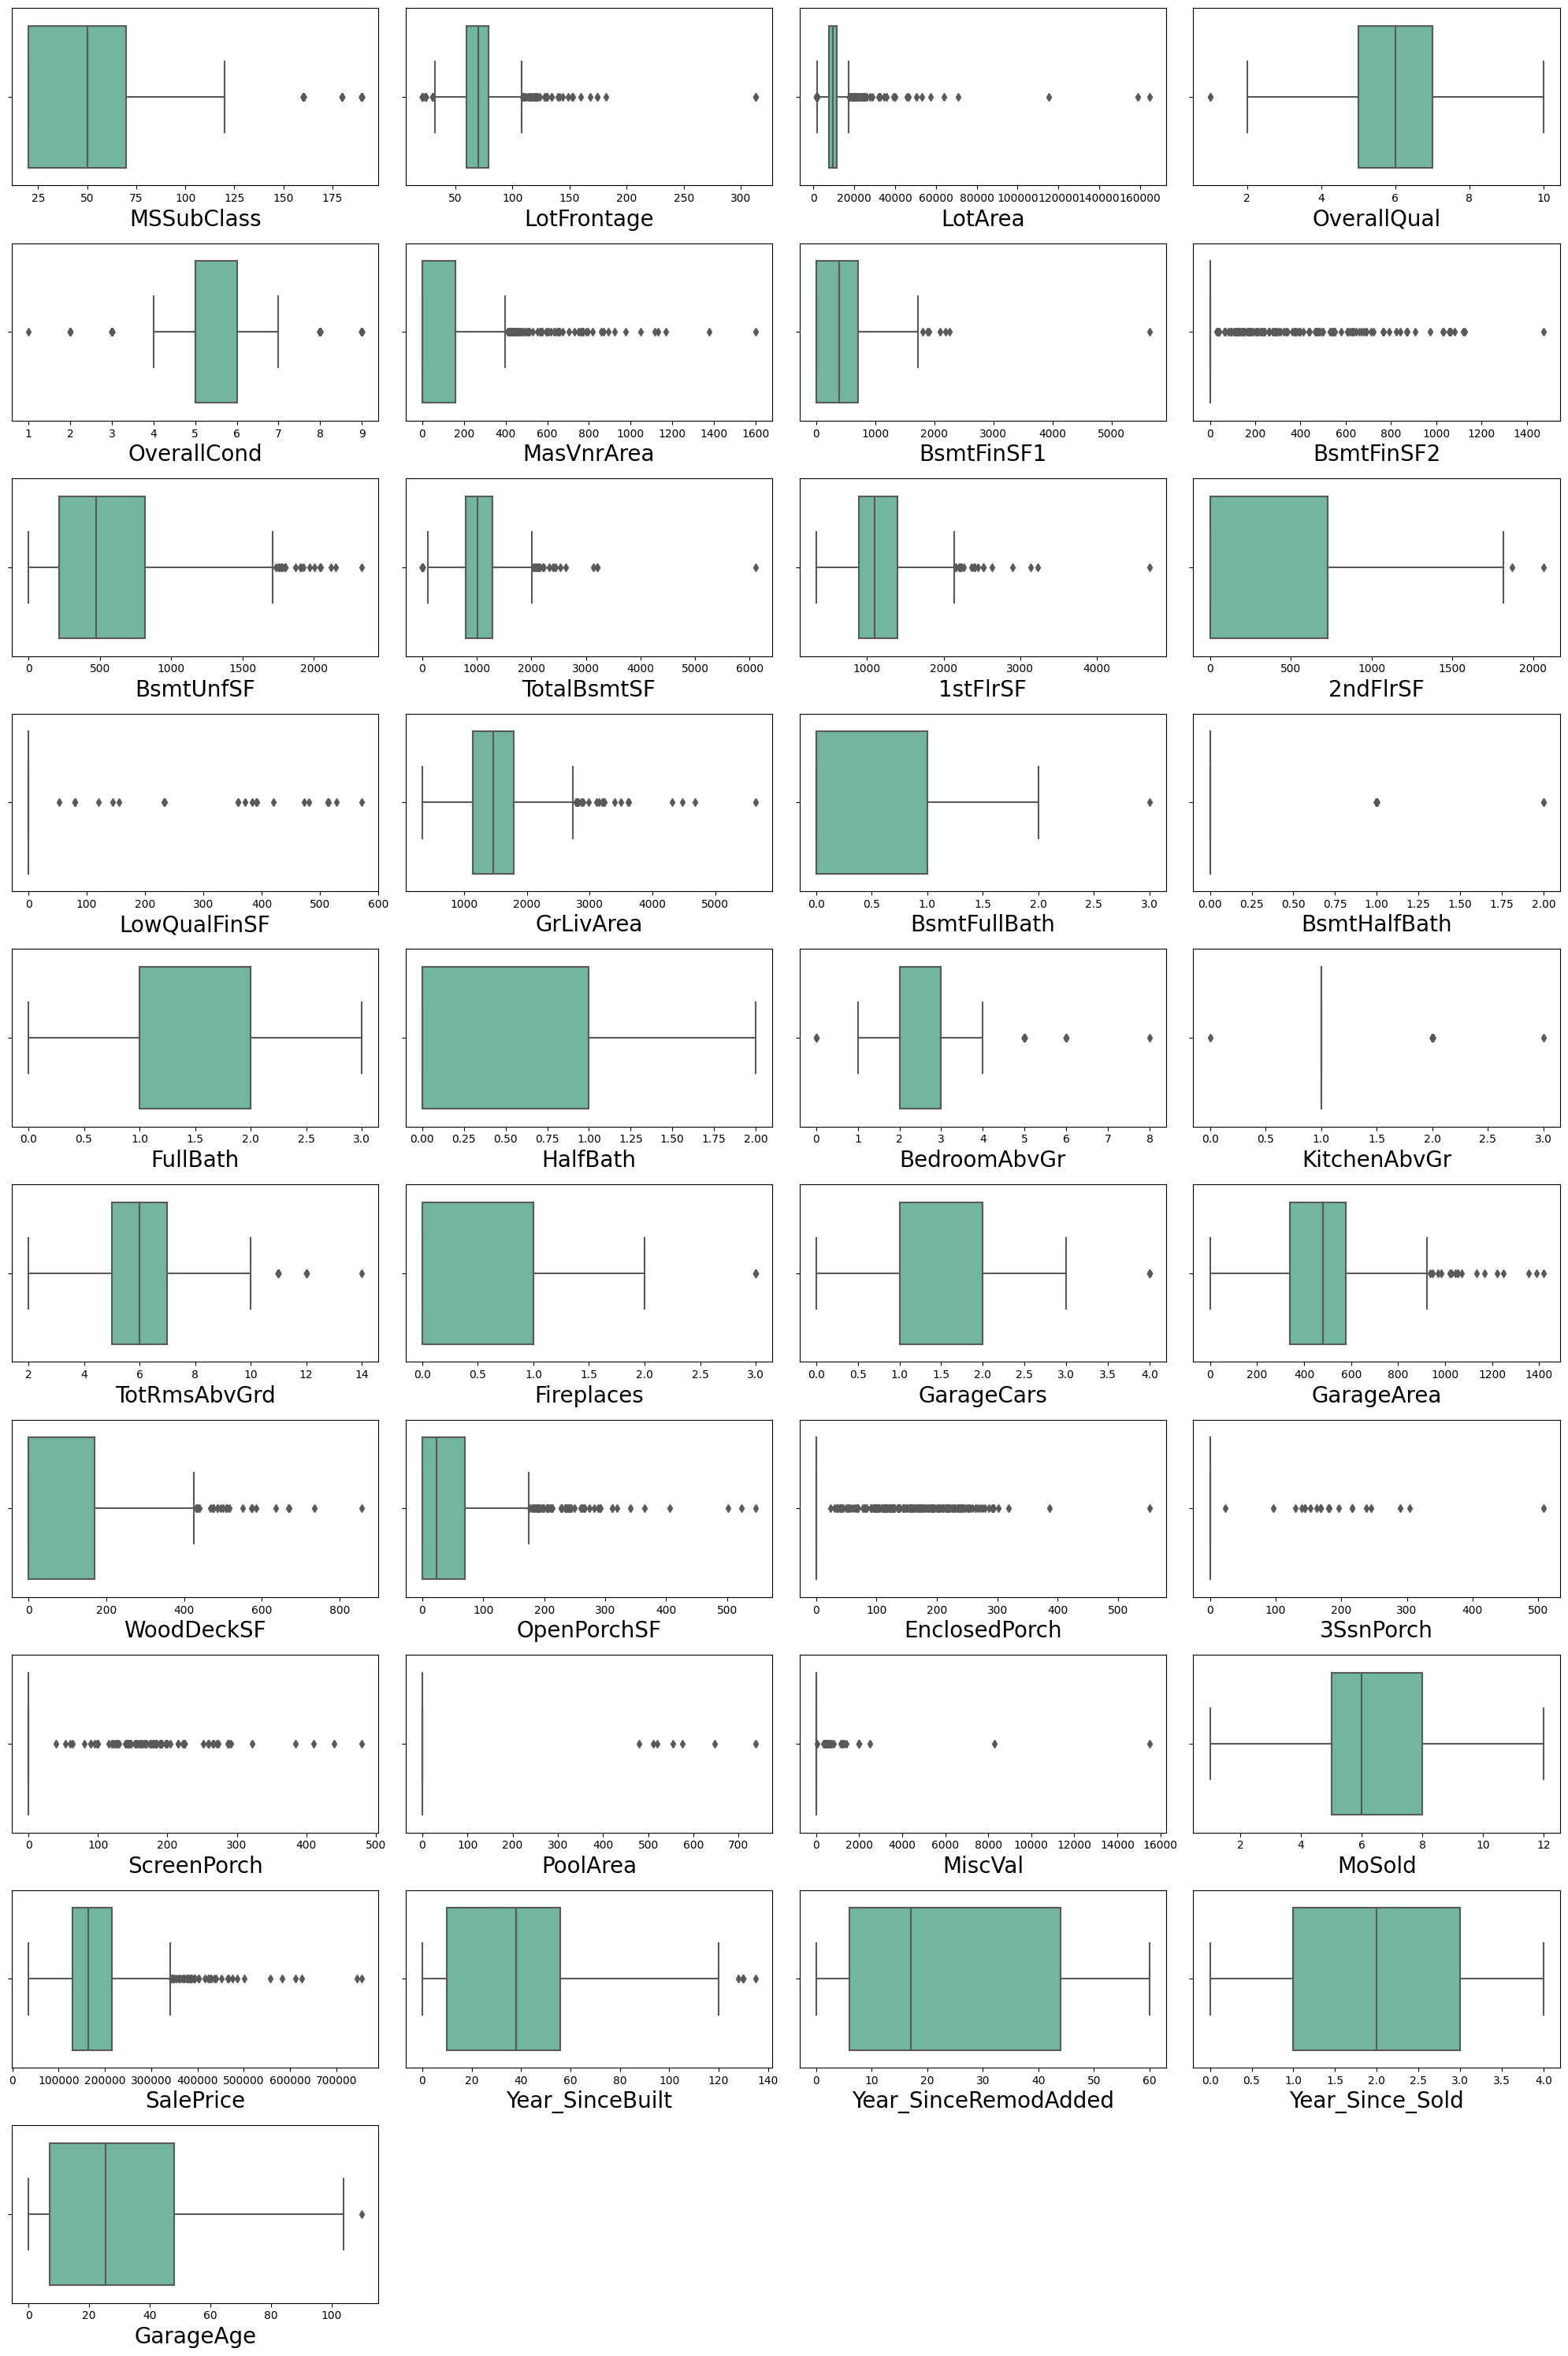

In [111]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- The Features which Contain Oultiers are very High and Hence we cannot Remove them becuase of Higher Data Loss

In [112]:
# Droping unnecessary columns
df.drop('Id','Utilities',axis=1,inplace=True)
df_test.drop('Id','Utilities',axis=1,inplace=True)

TotalBsmtSF is sum of above remaining features. We will drop other three feature

In [113]:
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
df_test.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)

GrLivArea is sum of above remaining features. We will drop other three features

In [116]:
df.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
df_test.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [117]:
df.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)
df_test.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

## Correlation 

In [118]:
df.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  \
MSSubClass              1.000000    -0.336234 -0.124151     0.070462   
LotFrontage            -0.336234     1.000000  0.296790     0.229981   
LotArea                -0.124151     0.296790  1.000000     0.107188   
OverallQual             0.070462     0.229981  0.107188     1.000000   
OverallCond            -0.056978    -0.047851  0.017513    -0.083167   
MasVnrArea              0.028215     0.188273  0.120192     0.403985   
TotalBsmtSF            -0.214042     0.356180  0.259733     0.528285   
GrLivArea               0.086448     0.374000  0.281360     0.599700   
BsmtFullBath            0.004556     0.092807  0.142387     0.101732   
BsmtHalfBath            0.008207     0.001375  0.059282    -0.030702   
FullBath                0.140807     0.171842  0.123197     0.548824   
HalfBath                0.168423     0.047149  0.007271     0.296134   
BedroomAbvGr           -0.013283     0.236946  0.117351     0.099639   
KitchenAbvGr            0.283506    -0.002082 -0.013075    -0.178220   
TotRmsAbvGrd            0.051179     0.318941  0.184546     0.432579   
Fireplaces             -0.035792     0.228494  0.285983     0.390067   
GarageCars             -0.027639     0.260224  0.158313     0.596322   
GarageArea             -0.092408     0.322750  0.195162     0.566782   
WoodDeckSF             -0.022609     0.087267  0.216720     0.227137   
OpenPorchSF             0.017468     0.151044  0.093080     0.341030   
MoSold                 -0.016015     0.022579  0.015141     0.090638   
SalePrice              -0.060775     0.323851  0.249499     0.789185   
Year_SinceBuilt        -0.023988    -0.112000 -0.005506    -0.575800   
Year_SinceRemodAdded   -0.056618    -0.089513 -0.027228    -0.555945   
Year_Since_Sold         0.038595     0.004162  0.035399     0.048759   
GarageAge              -0.093390    -0.028295  0.054091    -0.427205   

                      OverallCond  MasVnrArea  TotalBsmtSF  GrLivArea  \
MSSubClass              -0.056978    0.028215    -0.214042   0.086448   
LotFrontage             -0.047851    0.188273     0.356180   0.374000   
LotArea                  0.017513    0.120192     0.259733   0.281360   
OverallQual             -0.083167    0.403985     0.528285   0.599700   
OverallCond              1.000000   -0.135133    -0.162481  -0.065006   
MasVnrArea              -0.135133    1.000000     0.362330   0.384386   
TotalBsmtSF             -0.162481    0.362330     1.000000   0.461067   
GrLivArea               -0.065006    0.384386     0.461067   1.000000   
BsmtFullBath            -0.039680    0.084498     0.296654   0.036206   
BsmtHalfBath             0.091016    0.014974     0.009657  -0.013145   
FullBath                -0.171931    0.264357     0.311120   0.626275   
HalfBath                -0.052125    0.197831    -0.037014   0.403630   
BedroomAbvGr             0.028393    0.091339     0.036237   0.509273   
KitchenAbvGr            -0.076047   -0.039438    -0.065410   0.097929   
TotRmsAbvGrd            -0.039952    0.277737     0.273895   0.821845   
Fireplaces              -0.013632    0.241040     0.328241   0.464782   
GarageCars              -0.161996    0.340100     0.423592   0.455707   
GarageArea              -0.126021    0.363537     0.492980   0.459261   
WoodDeckSF               0.012290    0.152083     0.234848   0.242525   
OpenPorchSF             -0.024899    0.127876     0.249284   0.368318   
MoSold                   0.005519    0.012707     0.032920   0.065385   
SalePrice               -0.065642    0.460535     0.595042   0.707300   
Year_SinceBuilt          0.377731   -0.318562    -0.386265  -0.198644   
Year_SinceRemodAdded    -0.080669   -0.178583    -0.280720  -0.295048   
Year_Since_Sold         -0.055517    0.013220     0.030448   0.056401   
GarageAge                0.303182   -0.210228    -0.251091  -0.155869   

                      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
MSSubClass                0.00455

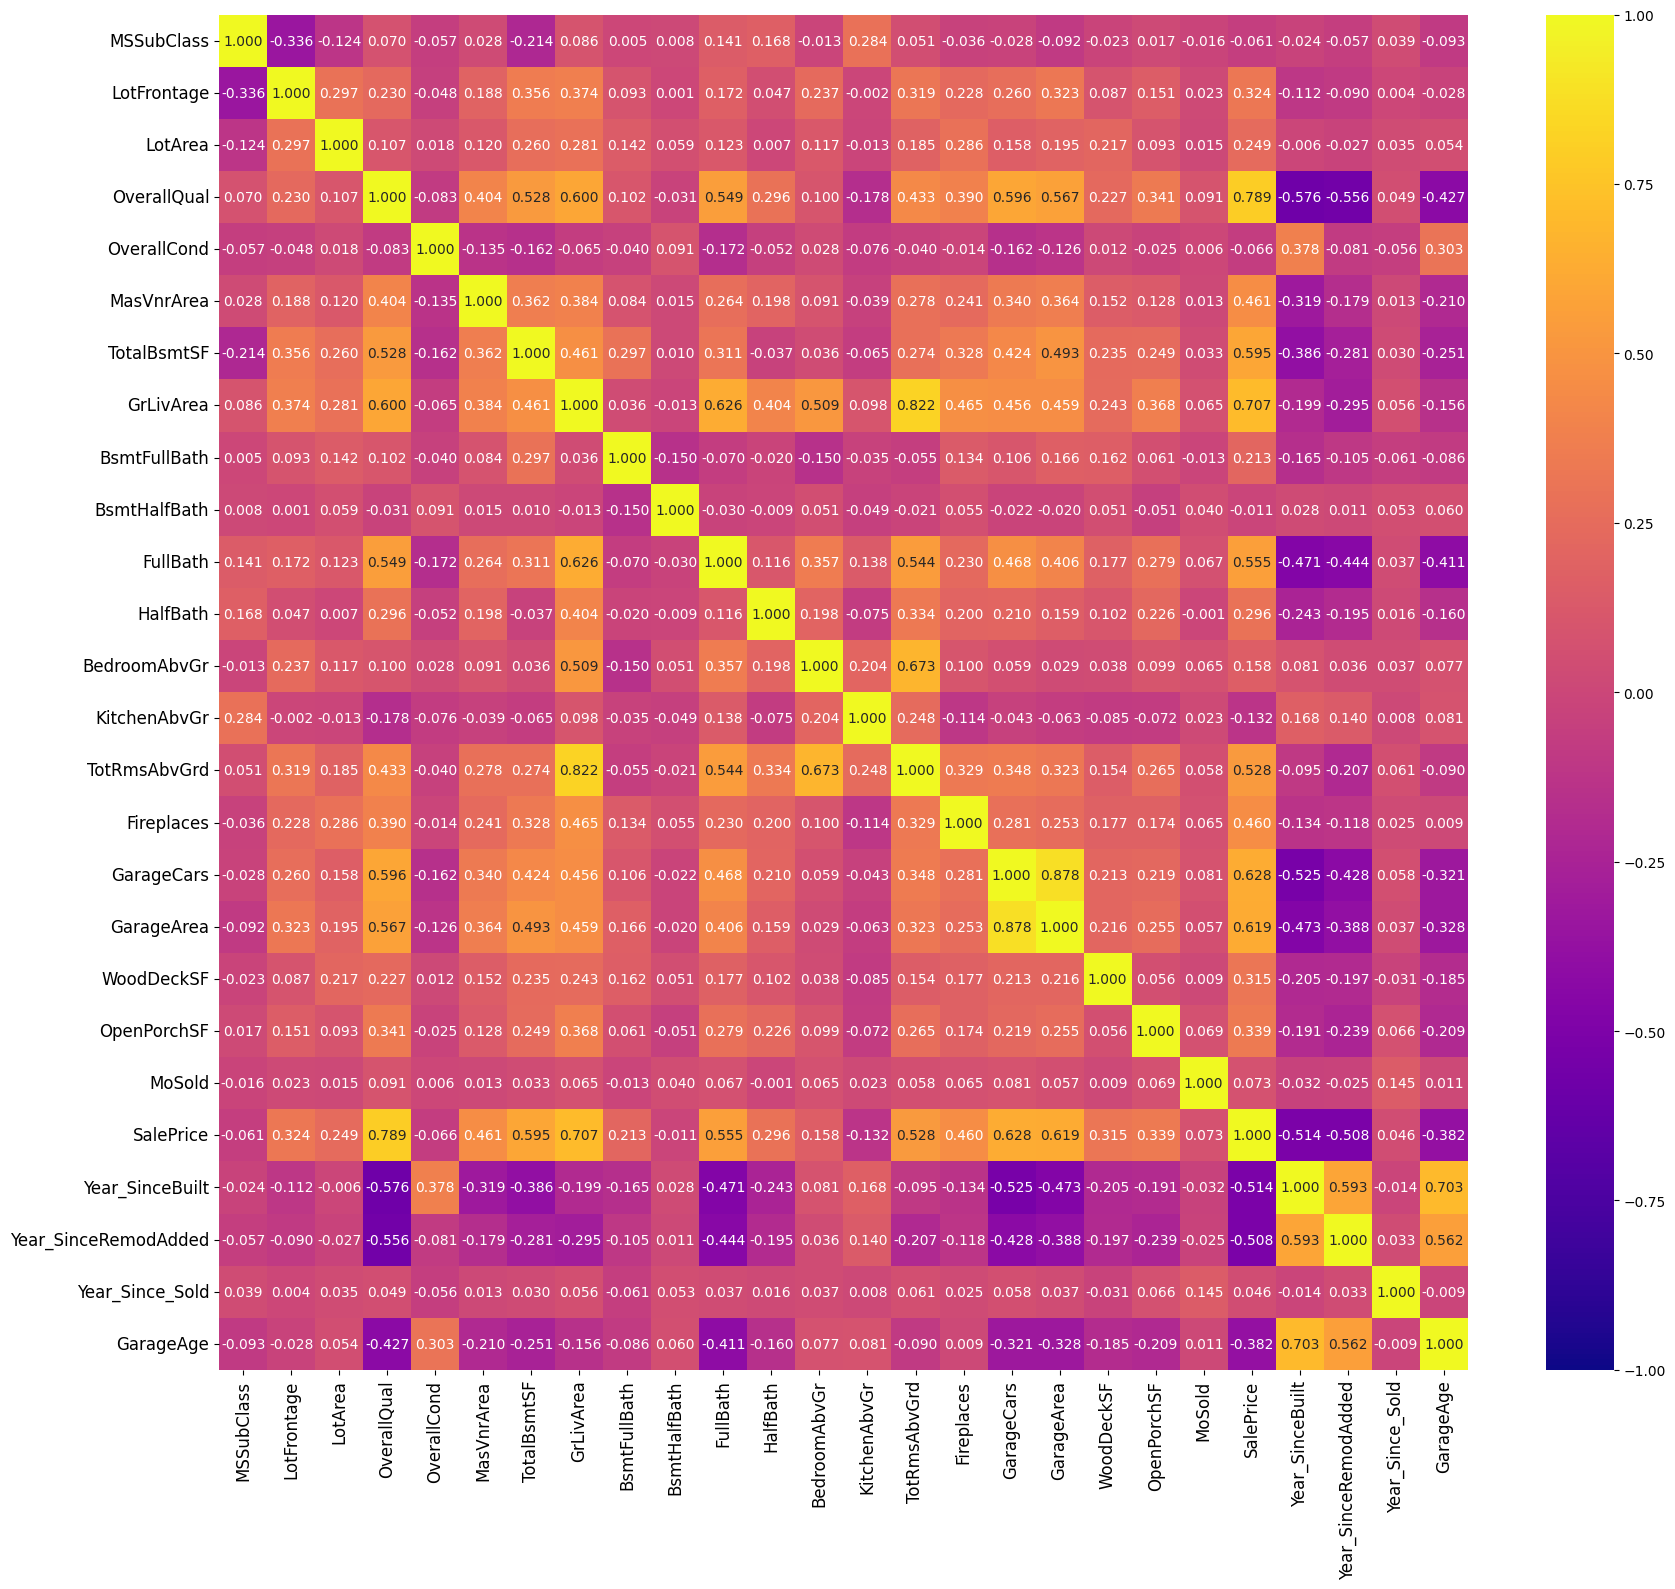

In [119]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=False, fmt='0.3f', 
            annot_kws={'size':10}, cmap="plasma")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

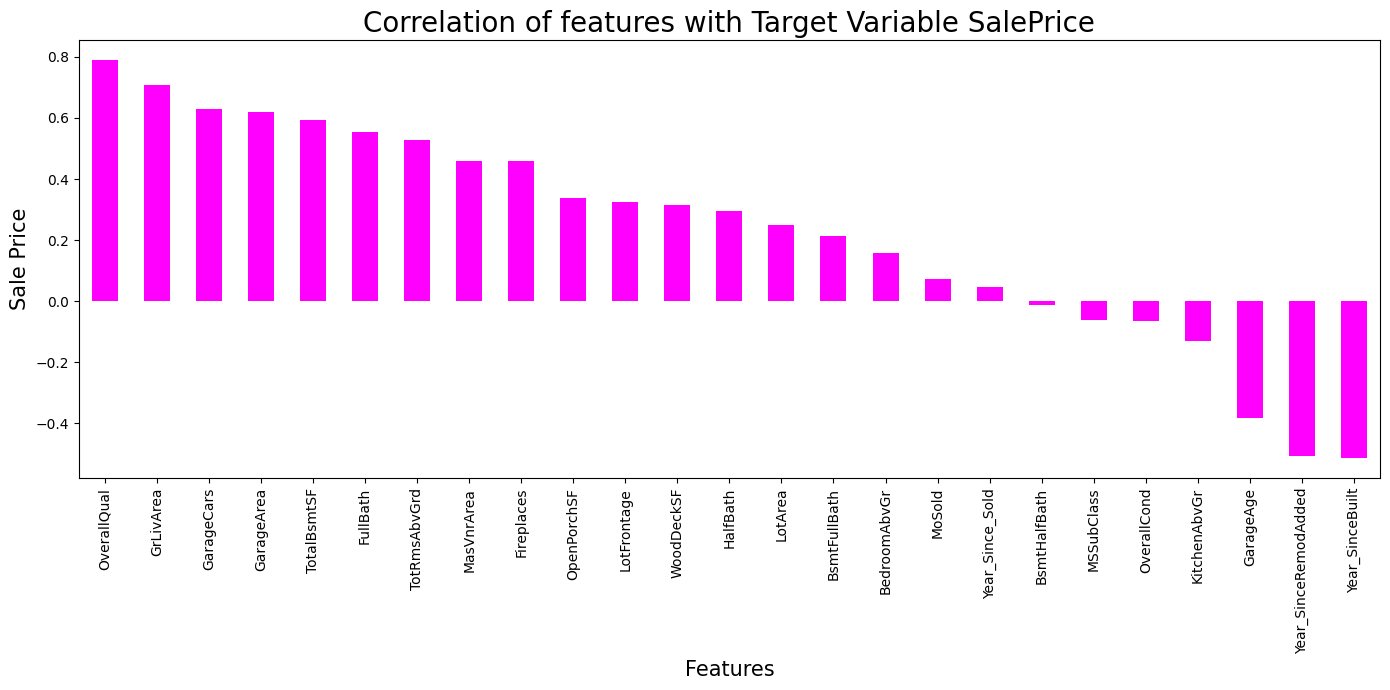

In [120]:
plt.figure(figsize = (14,7))
df.corr()['SalePrice'].drop(['SalePrice']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Sale Price',fontsize=15)
plt.title('Correlation of features with Target Variable SalePrice',fontsize = 20)
plt.tight_layout()
plt.show()

- OverallQual ,liveArea,Garage are Highly Related to the Price of the Features
- Similarly there are many fatures highly correlated to the Dataset

### Encoding the Categorical Features

In [121]:
Categorical_features = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
                        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [122]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120         3         70.0     4928       1         0            3   
1          20         3         95.0    15865       1         0            3   
2          60         3         92.0     9920       1         0            3   
3          20         3        105.0    11751       1         0            3   
4          20         3         70.0    16635       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0            13           2           2         4   
1          4          1            12           2           2         0   
2          1          0            15           2           2         0   
3          4          0            14           2           2         0   
4          2          0            14           2           2         0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0           2            6            5          1         1            8   
1           2            8            6          0         5           12   
2           5            7            5          1         1            7   
3           2            6            6          3         1            8   
4           2            6            7          1         1            4   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            9           2         0.0          3          4           1   
1           13           2         0.0          2          2           2   
2            7           2         0.0          2          4           2   
3            9           1       480.0          3          4           1   
4            4           3       126.0          2          4           1   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF  \
0         2         3             3             0             5         1078   
1         3         1             1             0             4         2217   
2         2         3             0             2             5         1117   
3         2         3             3             1             5         1844   
4         2         3             3             0             5         1602   

   Heating  HeatingQC  CentralAir  Electrical  GrLivArea  BsmtFullBath  \
0        1          4           1           4        958             0   
1        1          0           1           4       2217             1   
2        1          0           1           4       2013             1   
3        1          0           1           4       1844             0   
4        1          2           1           4       1602             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         0             2             1            3   
1             0         2         0             4             1            2   
2             0         2         1             3             1            3   
3             0         2         0             3             1            3   
4             1         2         0             3             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageFinish  GarageCars  \
0             5           6           1           1             1           2   
1             8           6           1           1             2           2   
2             8           6           1           1             2           2   
3             7           6           1           1             1           2   
4             8           6           1           1             0           2   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         440           4           4           2           0          205   
1         621           4           4           2          81          207   
2         455          

In [123]:
#For testing Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df_test[i] = le.fit_transform(df_test[i])
df_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2         86.0    14157       1         0            1   
1         120         2         65.0     5814       1         0            3   
2          20         2         65.0    11838       1         3            3   
3          70         2         75.0    12000       1         3            0   
4          60         2         86.0    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0           2            9            5          3         0            9   
1           2            8            5          1         0            5   
2           2            8            5          3         0            9   
3           5            7            7          1         0            6   
4           5            6            5          1         0            9   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0           11           3       200.0          2          3           2   
1            5           2         0.0          2          3           1   
2           11           2         0.0          2          3           2   
3            7           2         0.0          3          3           1   
4           11           3        74.0          2          3           2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF  \
0         0         2             1             2             5         1922   
1         2         2             0             2             5         1220   
2         2         2             0             5             5         1753   
3         3         2             3             4             5          704   
4         2         2             2             5             5          894   

   Heating  HeatingQC  CentralAir  Electrical  GrLivArea  BsmtFullBath  \
0        0          0           1           3       1922             1   
1        0          2           1           3       1360             1   
2        0          0           1           3       1788             0   
3        0          0           1           3       1564             0   
4        0          0           1           3       1933             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         0             3             1            2   
1             0         1         0             1             1            2   
2             0         2         0             3             1            0   
3             0         1         1             3             1            1   
4             0         2         1             4             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageFinish  GarageCars  \
0             8           5           1           1             0           3   
1             4           5           1           1             1           2   
2             7           5           1           1             1           2   
3             7           5           1           1             2           1   
4             9           5           1           3             0           3   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         676           4           4           2         178           51   
1         565           4           4           2          63            0   
2         522          

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1168 non-null   int64  
 1   MSZoning              1168 non-null   int32  
 2   LotFrontage           1168 non-null   float64
 3   LotArea               1168 non-null   int64  
 4   Street                1168 non-null   int32  
 5   LotShape              1168 non-null   int32  
 6   LandContour           1168 non-null   int32  
 7   LotConfig             1168 non-null   int32  
 8   LandSlope             1168 non-null   int32  
 9   Neighborhood          1168 non-null   int32  
 10  Condition1            1168 non-null   int32  
 11  Condition2            1168 non-null   int32  
 12  BldgType              1168 non-null   int32  
 13  HouseStyle            1168 non-null   int32  
 14  OverallQual           1168 non-null   int64  
 15  OverallCond          

### Feature Scaling

In [126]:
X = df.drop('SalePrice',axis = 1)
y = df.SalePrice

In [127]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale_test = scaler.fit_transform(df_test)

### Model Training and Selection

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size=0.2)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', y_test.shape)

Training Feature Matrix Size: (934, 62)
Training Target Vector Size : (934,)
Test Feature Matrix Size: (234, 62)
Test Target Vector Size: (234,)


#### For Best Random State

In [133]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=i, test_size=0.20)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8969343733155823 on Random_state 266


#### Linear Regression

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 266, test_size=0.20)
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred)*100)

Error :
Mean absolute error : 16755.119080357068
Mean squared error : 468632928.0569503
Root Mean squared error : 21647.931265064344
 R2 Score :
89.69343733155823


#### Cross Validation of Linear Regression

In [136]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7662072724233103
Difference in R2 & CV Score: 13.0727100892272


### Decision Tree Regressor

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 266, test_size=0.20)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 30015.23076923077
Mean squared error : 2151291356.786325
Root Mean squared error : 46382.01544549703
R2 Score of Decision Tree Regressor :
71.74674786725194


#### Cross Vaidation

In [141]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X, y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6814966900182493
Difference in R2 & CV Score: 3.597078865427008


#### Random Forest Regressor

In [143]:
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state= 266, test_size=0.20)
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 17725.927487046632
Mean squared error : 669356405.9270023
Root Mean squared error : 25871.92311999636
R2 Score of Random Forest Regressor :
90.3829722756163


##### Cross Validation of Random Forest Regressor

In [144]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc,X,y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8312567397795227
Difference in R2 & CV Score: 7.257298297664022


#### Extra Tree Regressor

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 266, test_size=0.20)
etc = ExtraTreesRegressor()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 14411.390042735044
Mean squared error : 378291300.9373927
Root Mean squared error : 19449.712104229016
R2 Score of Extra Tree Regressor :
91.68030506050187


##### cross Validation of Exta Tree Regressor

In [147]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X,y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())
print('Difference in R2 & CV Score:',(r2_score(y_test,y_pred)*100)-(score.mean()*100))

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.8315782868043463
Difference in R2 & CV Score: 8.522476380067232


#### Hyper Parameter Tuning : GridSearchCV

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [151]:
parameter = {
 'bootstrap': [True, False],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4 ],
 'n_estimators': [100, 500,1000,1500,2000]}

In [154]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose =10)
GCV.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 1/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.864 total time=   0.8s
[CV 2/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.770 total time=   0.8s
[CV 3/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.843 total time=   0.8s
[CV 4/5; 1/30] START bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 1/30] END bootstrap=True, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.765 total time=   0.8s
[CV 5/5; 1/30] START bootstrap=True, max_features=auto, min_samples_le

[CV 3/5; 8/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.841 total time=   6.7s
[CV 4/5; 8/30] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 4/5; 8/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.797 total time=   6.6s
[CV 5/5; 8/30] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 5/5; 8/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.832 total time=   6.7s
[CV 1/5; 9/30] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 1/5; 9/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.868 total time=  10.0s
[CV 2/5; 9/30] START bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 2/5; 9/30] END bootstrap=True, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.756 total time=  10.1s

[CV 1/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.718 total time=   0.8s
[CV 2/5; 16/30] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 2/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.767 total time=   0.9s
[CV 3/5; 16/30] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 3/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.546 total time=   0.9s
[CV 4/5; 16/30] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 4/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.530 total time=   0.8s
[CV 5/5; 16/30] START bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100
[CV 5/5; 16/30] END bootstrap=False, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.731 total tim

[CV 3/5; 23/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.527 total time=   8.0s
[CV 4/5; 23/30] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 4/5; 23/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.744 total time=   7.4s
[CV 5/5; 23/30] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000
[CV 5/5; 23/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1000;, score=0.689 total time=   7.7s
[CV 1/5; 24/30] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 1/5; 24/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.732 total time=  11.3s
[CV 2/5; 24/30] START bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500
[CV 2/5; 24/30] END bootstrap=False, max_features=auto, min_samples_leaf=2, n_estimators=1500;, score=0.776 

[CV 5/5; 30/30] END bootstrap=False, max_features=auto, min_samples_leaf=4, n_estimators=2000;, score=0.548 total time=  12.6s


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 1000, 1500, 2000]},
             verbose=10)

#### Final Model

In [155]:
Final_mod=RandomForestRegressor(max_depth = None, bootstrap = True, max_features='sqrt', min_samples_leaf = 1,
                                n_estimators = 100 )
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 90.74498594610705
mean_squared_error: 420819673.32953846
mean_absolute_error: 14692.97452991453
RMSE value: 20513.889765949763


#### Saving the Model

In [156]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Surprise_Housing_Price_Prediction.pkl")

['Surprise_Housing_Price_Prediction.pkl']

#### Predictions of Test Dataset Using Final Model

In [157]:
# Loading the saved model
model = joblib.load("Surprise_Housing_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_scale_test)
prediction

array([332870.6 , 217795.93, 254940.  , 173986.  , 249111.14,  98319.13,
       146416.38, 296670.56, 225622.44, 185140.8 ,  87188.56, 145515.87,
       129828.14, 180463.81, 330265.85, 129103.03, 122425.3 , 129746.64,
       172041.66, 198289.  , 154591.  , 159028.  , 147765.1 , 103020.79,
       102430.12, 127366.05, 185421.55, 144178.26, 181156.57, 113789.6 ,
       144952.65, 191748.04, 239961.89, 157156.5 , 117547.4 , 179327.67,
       193160.52, 112247.5 , 156675.  , 146596.03, 107289.21, 325003.66,
       202933.91, 189891.04, 143873.25, 131837.85, 133934.33, 103524.05,
       203067.75, 330364.18, 153694.2 , 204071.5 , 104876.98,  95649.  ,
       296668.09, 131867.58, 147518.26, 189223.54, 124452.62, 262088.54,
       105196.3 , 183265.7 , 129897.04, 148982.3 , 191524.62, 102572.02,
       156939.4 , 208738.15, 142239.1 , 167461.  , 282028.8 , 161609.66,
       185134.99, 144513.49, 148843.3 , 239778.87, 317563.8 , 202667.06,
       269561.  , 142867.  , 216606.28, 145219.99, 

In [158]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset
Test_data_Predication = pd.DataFrame()
Test_data_Predication['SalePrice']=prediction
Test_data_Predication.head()

SalePrice
0  332870.60
1  217795.93
2  254940.00
3  173986.00
4  249111.14

In [159]:
Final_test_data = pd.concat([df_test, Test_data_Predication], axis=1)
Final_test_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2         86.0    14157       1         0            1   
1         120         2         65.0     5814       1         0            3   
2          20         2         65.0    11838       1         3            3   
3          70         2         75.0    12000       1         3            0   
4          60         2         86.0    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0           2            9            5          3         0            9   
1           2            8            5          1         0            5   
2           2            8            5          3         0            9   
3           5            7            7          1         0            6   
4           5            6            5          1         0            9   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0           11           3       200.0          2          3           2   
1            5           2         0.0          2          3           1   
2           11           2         0.0          2          3           2   
3            7           2         0.0          3          3           1   
4           11           3        74.0          2          3           2   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  TotalBsmtSF  \
0         0         2             1             2             5         1922   
1         2         2             0             2             5         1220   
2         2         2             0             5             5         1753   
3         3         2             3             4             5          704   
4         2         2             2             5             5          894   

   Heating  HeatingQC  CentralAir  Electrical  GrLivArea  BsmtFullBath  \
0        0          0           1           3       1922             1   
1        0          2           1           3       1360             1   
2        0          0           1           3       1788             0   
3        0          0           1           3       1564             0   
4        0          0           1           3       1933             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         0             3             1            2   
1             0         1         0             1             1            2   
2             0         2         0             3             1            0   
3             0         1         1             3             1            1   
4             0         2         1             4             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageFinish  GarageCars  \
0             8           5           1           1             0           3   
1             4           5           1           1             1           2   
2             7           5           1           1             1           2   
3             7           5           1           1             2           1   
4             9           5           1           3             0           3   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         676           4           4           2         178           51   
1         565           4           4           2          63            0   
2         522          